# Deep Learning for Sentiment and Genre Classification Using Amazon Book Reviews

## 1. Introduction 

This project utilizes advanced deep learning techniques to analyze Amazon book reviews, focusing on two tasks: sentiment classification (positive, neutral, and negative) and multi-label genre classification. By leveraging transformer models like BERT alongside CNNs and LSTMs, the system aims to extract actionable insights for authors, publishers, and e-commerce platforms while improving book discoverability and user experience. Techniques such as SMOTE for class balancing and attention visualization ensure fairness and interpretability. This comprehensive approach bridges gaps in literature, offering robust, scalable, and explainable solutions to enhance recommendation systems and e-commerce analytics.

## 2. Data Loading and Preprocessing
This section includes codes and explanations for data preprocessing, an important step in any machine learning projects. 

### Loading & Merging Datasets

In [7]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Dropout

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Load the datasets
books_rating = pd.read_csv(r"C:\Users\ASUS\Desktop\BSc (Hons) Computer Science UOL\Final Year Project\FYP Project\Books_rating.csv")  
books_data = pd.read_csv(r"C:\Users\ASUS\Desktop\BSc (Hons) Computer Science UOL\Final Year Project\FYP Project\books_data.csv")  

In [9]:
# Load the datasets
books_rating = pd.read_csv(r"C:\Users\ASUS\Desktop\BSc (Hons) Computer Science UOL\Final Year Project\FYP Project\Books_rating.csv")  
books_data = pd.read_csv(r"C:\Users\ASUS\Desktop\BSc (Hons) Computer Science UOL\Final Year Project\FYP Project\books_data.csv")  

In [10]:
books_rating.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [11]:
books_data.head(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [12]:
books = pd.merge(books_rating, books_data, on='Title')
print("Merged shape:", books.shape)

Merged shape: (3000000, 19)


### Data Cleaning 

In [14]:
# Select important features for sentiment & genre tasks
df = books[['Title', 'review/score', 'review/text', 'authors', 'categories',
            'ratingsCount', 'description', 'publisher']]

In [15]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)

After dropping duplicates: (2617289, 8)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20268\410422149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [16]:
# Check for missing values
print("Missing values:\n", df.isna().sum())

# Sample 15,000 rows for development
data = df.sample(15000, random_state=42)
print("Sampled data shape:", data.shape)

Missing values:
 Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
description      571385
publisher        696185
dtype: int64
Sampled data shape: (15000, 8)


In [17]:
# Clean author and category columns
data['authors'] = data['authors'].astype(str).str.extract(r"'([^']*)'")
data['categories'] = data['categories'].astype(str).str.extract(r"'([^']*)'")

In [18]:
# Handle missing values
data['authors'].fillna("Unknown", inplace=True)
data['categories'].fillna("Uncategorized", inplace=True)
data['ratingsCount'].fillna(0, inplace=True)
data['description'].fillna("No description", inplace=True)
data['publisher'].fillna("Unknown Publisher", inplace=True)
data['review/text'].fillna("No review", inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20268\1347736773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['authors'].fillna("Unknown", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20268\1347736773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [19]:
# Save as cleaned CSV
data.to_csv("cleaned_sample_books.csv", index=False)
print(" Cleaned data saved as 'cleaned_sample_books.csv'")

 Cleaned data saved as 'cleaned_sample_books.csv'


In [20]:
data.head(10)

,Title,review/score,review/text,authors,categories,ratingsCount,description,publisher
1141424,Black Rose,4.0,"For decades, a weeping spectre has walked the ...",Tananarive Due,Fiction,3.0,“One of the most exciting novels of the year ....,One World
505655,Bobby Fischer,5.0,"For this new generation, the name of Bobby Fis...",Bobby Fischer,Games,7.0,Programmed text offers experienced as well as ...,Bantam
186549,Bleeding Hearts,3.0,Ian Rankin has earned a high reputation for po...,Susan Wittig Albert,Fiction,10.0,While conducting a discreet investigation into...,Berkley Publishing Group
2757707,Dr. Goat,4.0,"just what we were looking for, a little beat u...",Unknown,Uncategorized,0.0,No description,Unknown Publisher
1727757,The Great Controversy Between Christ and Satan...,1.0,This text serves as the blueprint for a group ...,Ellen G. White,Uncategorized,1.0,Beginning with the destruction of Jerusalem an...,GENERAL PRESS
1126781,Cassell's Contemporary German: A Handbook of G...,5.0,Too bad the Cassell's Contemporary Italian/Fre...,Unknown,Uncategorized,0.0,No description,Unknown Publisher
566272,Adventures of Huckleberry Finn (Simple English),4.0,"By reading this book, I understand that Mark T...",Mark Twain,Uncategorized,0.0,"Mark Twain's ""Adventures of Huckleberry Finn"" ...",Unknown Publisher
291869,the Picture of Dorian Gray,2.0,"For me, The Picture of Dorian Gray was a tedio...",Oscar Wilde,Fiction,0.0,The Picture of Dorian Gray was first published...,Standard Ebooks
654651,The Silmarillion,5.0,"In 1917, with WWI howling about him, JRR Tolki...",J. R. R. Tolkien,Fiction,118.0,Tales and legends chronicling the world's begi...,Unknown Publisher
768575,THE WAVES (WORLD'S CLASSICS),2.0,One peculiar quality of many of Woolf's novels...,Virginia Woolf,Friendship,0.0,"'I, who would wish to feel close over me the p...","Oxford University Press, USA"


###  Apply SMOTE for Sentiment Classes

In [22]:
!pip install imbalanced-learn


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create combined text column (Title + review + authors)
data['text_input'] = (
    data['Title'].fillna('') + ' ' +
    data['review/text'].fillna('') + ' ' +
    data['authors'].fillna('')
)

# Step 2: Map review scores to sentiment classes
def map_sentiment(score):
    if score <= 2.0:
        return 0  # Negative
    elif score == 3.0:
        return 1  # Neutral
    else:
        return 2  # Positive

data['sentiment'] = data['review/score'].apply(map_sentiment)

# Step 3: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['text_input'])

y = data['sentiment']

# Step 4: Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Step 5: Check results
from collections import Counter
print("Class distribution after SMOTE:\n", Counter(y_resampled))


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class distribution after SMOTE:
 Counter({2: 11910, 1: 11910, 0: 11910})


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20268\1538777990.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment Class', y='Count', data=df_counts, palette='Set2')


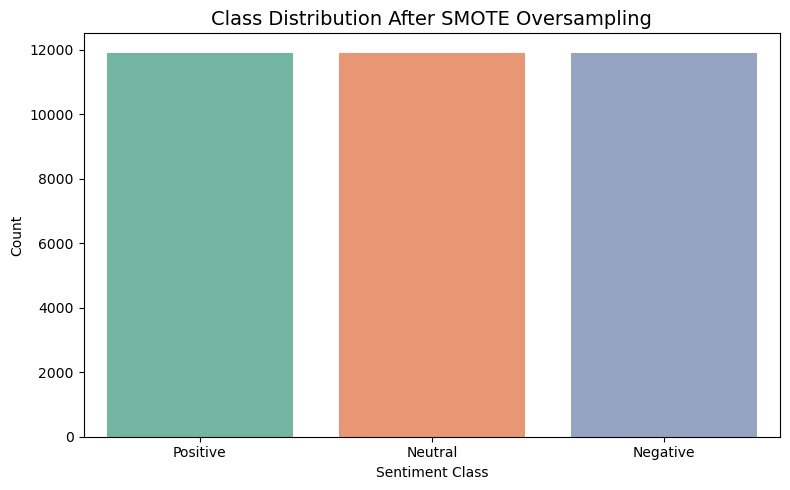

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming y_resampled is already created from SMOTE
class_counts = Counter(y_resampled)

# Convert to DataFrame for plotting
df_counts = pd.DataFrame.from_dict(class_counts, orient='index').reset_index()
df_counts.columns = ['Sentiment Class', 'Count']

# Optional mapping if 0 = Negative, 1 = Neutral, 2 = Positive
sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df_counts['Sentiment Class'] = df_counts['Sentiment Class'].map(sentiment_map)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment Class', y='Count', data=df_counts, palette='Set2')
plt.title('Class Distribution After SMOTE Oversampling', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Sentiment Class')
plt.tight_layout()
plt.show()

### Tokenize Review Text Using BERT
We'll use HuggingFace's bert-base-uncased tokenizer to convert text_input (title + review + author) into token embeddings suitable for model input.

In [26]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input text (text_input column)
bert_inputs = tokenizer(
    list(data['text_input'].fillna("")),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

# Preview input shape
print("Input IDs shape:", bert_inputs['input_ids'].shape)
print("Attention Mask shape:", bert_inputs['attention_mask'].shape)


Input IDs shape: torch.Size([15000, 128])
Attention Mask shape: torch.Size([15000, 128])


### Genre Classification (Multi-Label) Using categories Column
We'll one-hot encode the genre labels (multi-label) for multi-label classification.

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

# Clean and convert genre strings to list
data['categories'] = data['categories'].fillna("[]")
data['categories'] = data['categories'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else [x])

# Apply one-hot encoding for multi-label genres
mlb = MultiLabelBinarizer()
genre_labels = mlb.fit_transform(data['categories'])

# Create a DataFrame with the one-hot encoded genres
genre_df = pd.DataFrame(genre_labels, columns=mlb.classes_)

# Combine back with original data
data = pd.concat([data.reset_index(drop=True), genre_df], axis=1)

# Preview
print("Genre labels (multi-label) shape:", genre_df.shape)
print("Final data shape after one-hot encoding:", data.shape)


Genre labels (multi-label) shape: (15000, 935)
Final data shape after one-hot encoding: (15000, 945)


### Splitting Data 

In [30]:
from sklearn.model_selection import train_test_split

# Combine title, review, and authors into one column for sentiment analysis
data['text_input'] = data['Title'].fillna('') + " " + \
                     data['review/text'].fillna('') + " " + \
                     data['authors'].fillna('')

# Sentiment labels: map review/score to positive/neutral/negative
def score_to_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['review/score'].apply(score_to_sentiment)

# Drop rows with empty input (just in case)
data = data[data['text_input'].str.strip() != ""]

# Define input and target
X = data['text_input']
y = data['sentiment']

# Train-validation-test split (70% train, 15% val, 15% test)
# Step 1: Split 30% off for val + test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Step 2: Split the 30% into equal halves = 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Show final sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 10500
Validation set size: 2250
Testing set size: 2250


### 3. Exploratory Data Analysis (EDA)

EDA involves examining the Amazon book reviews dataset to uncover patterns, trends, and anomalies. Key tasks include analyzing the distribution of sentiments and genres, identifying class imbalances, and addressing missing or inconsistent data to ensure a clean and balanced dataset for training models.


### Distrubution of Books Based on Top 10 Genres

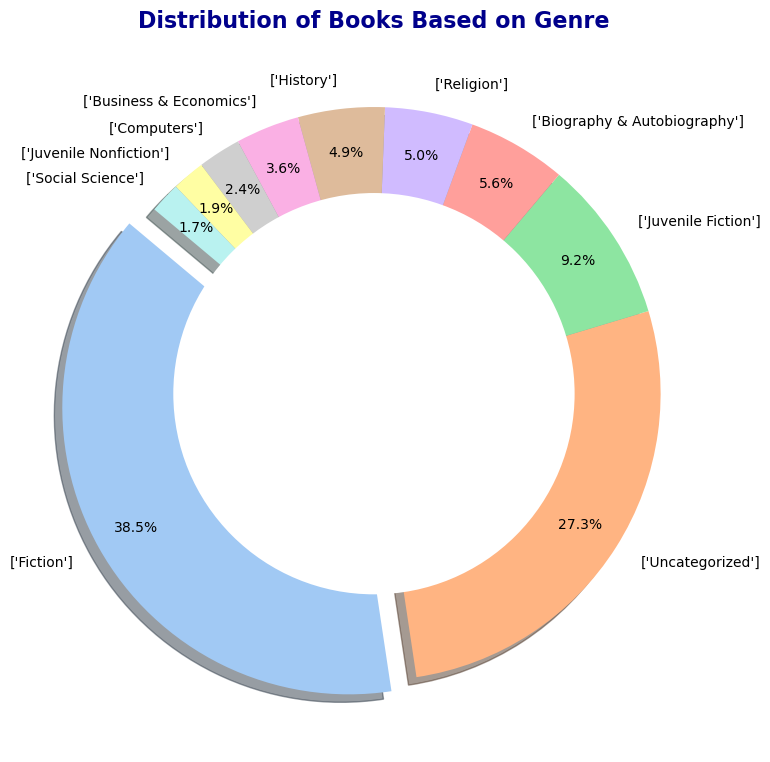

In [32]:
# Define the genre categories and their counts
categories = data['categories'].value_counts().head(10)
labels = categories.index
sizes = categories.values

# Define custom colors using a palette
colors = sns.color_palette('pastel', len(categories))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=[0.1] + [0] * (len(sizes) - 1), 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.85, 
        shadow=True)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of Books Based on Genre', fontsize=16, weight='bold', color='darkblue')

# Display the chart
plt.tight_layout()
plt.show()

### Word Cloud Visualization for Positive Reviews

This visualization highlights the most frequently used words in positive Amazon Kindle book reviews (with review scores greater than 3). The word cloud is generated using TF-IDF-enhanced text and customized color styling for improved readability. Larger words indicate higher frequency and relevance in user sentiment, offering insights into common themes, emotions, and expressions used by satisfied readers.


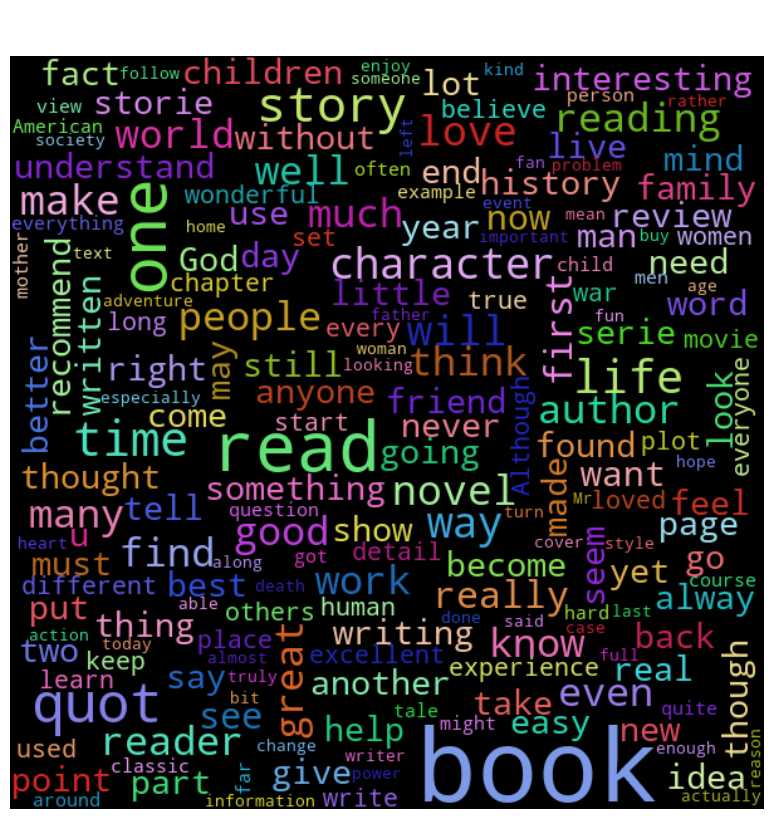

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a custom color function for the word cloud
from wordcloud import STOPWORDS
import random

def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, {}%, {}%)".format(random.randint(0, 360), 70, random.randint(40, 80))

# Generate the word cloud with enhancements
wc = WordCloud(
    width=600,
    height=600,
    min_font_size=12,
    max_font_size=80,
    background_color='black',
    colormap='cool',
    stopwords=STOPWORDS,
    contour_color='white',
    contour_width=2,
    color_func=random_color_func,
)

# Generate the word cloud for positive reviews
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', fontsize=18, weight='bold', color='white', pad=20)
plt.tight_layout(pad=0)
plt.show()

### Sentiment Distribution Analysis

Understanding the sentiment distribution across book reviews is crucial. Let's visualize how many reviews fall under positive, neutral, and negative sentiment.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1908\412763090.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


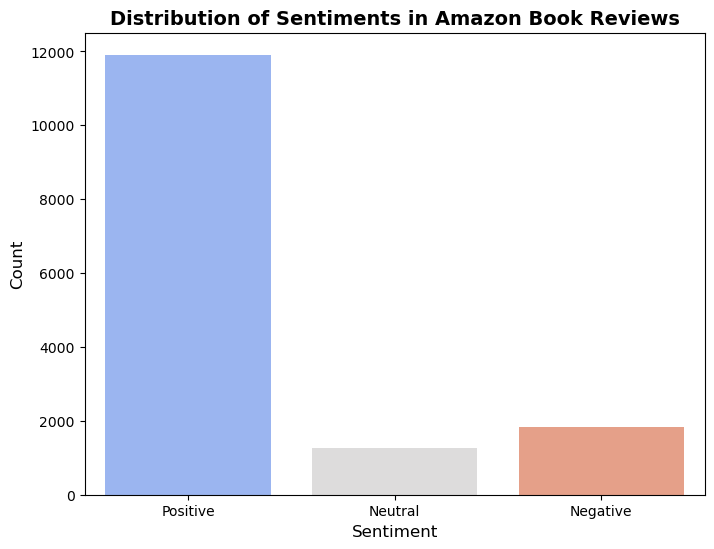

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorizing reviews based on score
data['sentiment'] = data['review/score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiments in Amazon Book Reviews', fontsize=14, weight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Sentiment Score vs. Word Count

Longer reviews might indicate stronger opinions. Let's analyze how review length affects sentiment.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1908\2795758593.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='word_count', data=data, palette='coolwarm')


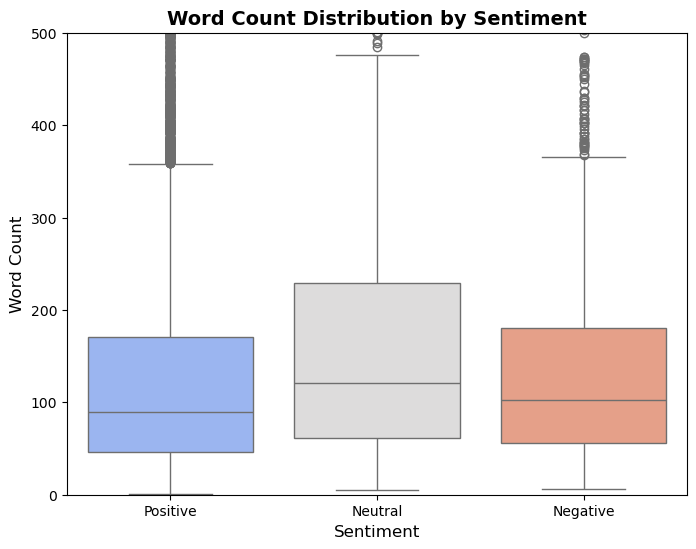

In [49]:
import numpy as np

# Calculate review length
data['word_count'] = data['review/text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Boxplot of review length across sentiments
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='word_count', data=data, palette='coolwarm')
plt.ylim(0, 500)  # Limit for better visualization
plt.title('Word Count Distribution by Sentiment', fontsize=14, weight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.show()

### Top 10 Most Reviewed Books

Identifying the most reviewed books can provide insights into trends.


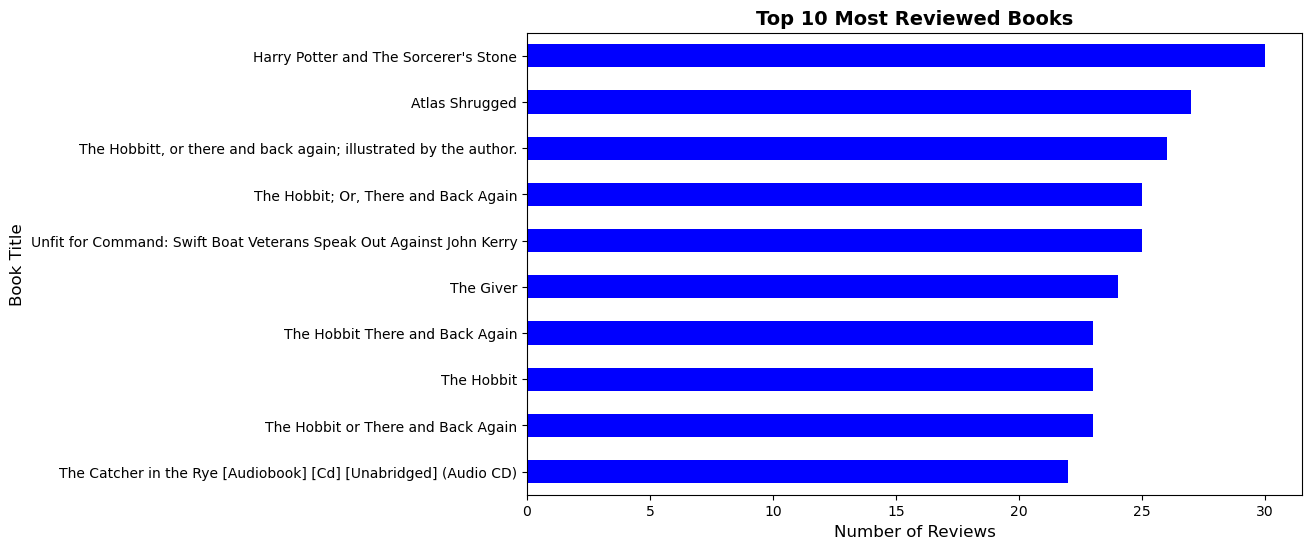

In [51]:
# Top 10 books by number of reviews
top_books = data.groupby('Title').size().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_books.plot(kind='barh', color='blue')
plt.title('Top 10 Most Reviewed Books', fontsize=14, weight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Heatmap of Correlation Between Numerical Features

Analyzing correlations between numerical features like ratings, word count, and review length.


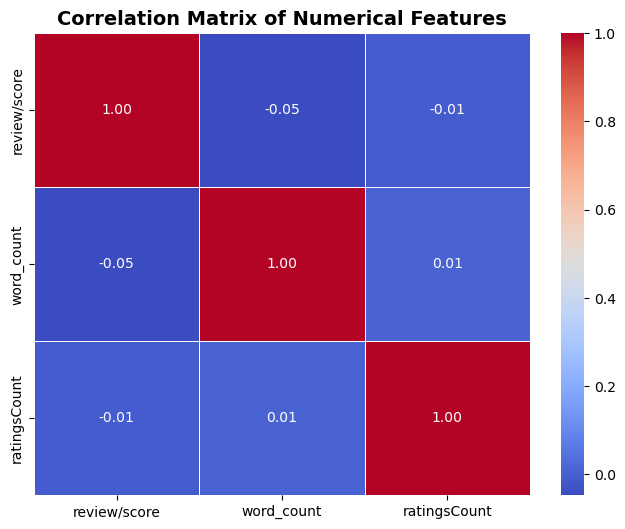

In [53]:
import seaborn as sns

# Selecting numerical columns
num_cols = ['review/score', 'word_count', 'ratingsCount']
corr_matrix = data[num_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, weight='bold')
plt.show()

### Most Popular Authors (Based on Review Count)

Identifying authors with the highest number of book reviews can provide insights into which authors are most discussed by readers.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1908\1741890287.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette='magma')


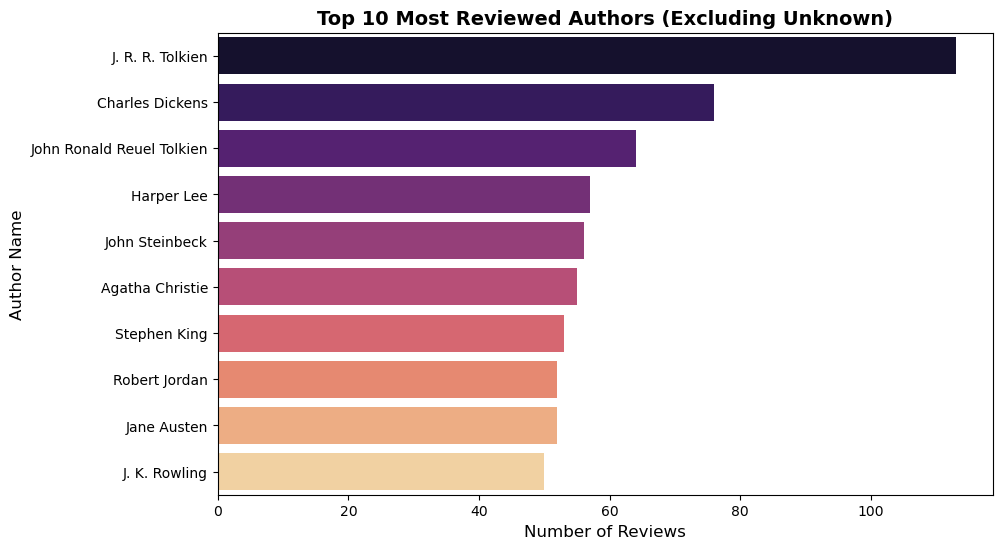

In [55]:
# Remove unknown authors
filtered_authors = data[data['authors'].str.lower() != 'unknown']

# Top 10 authors by review count (excluding Unknown)
top_authors = filtered_authors['authors'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values, palette='magma')
plt.title('Top 10 Most Reviewed Authors (Excluding Unknown)', fontsize=14, weight='bold')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Author Name', fontsize=12)
plt.show()


### Average Ratings Per Genre

Different genres may have varying average ratings.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1908\1188932122.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='coolwarm')


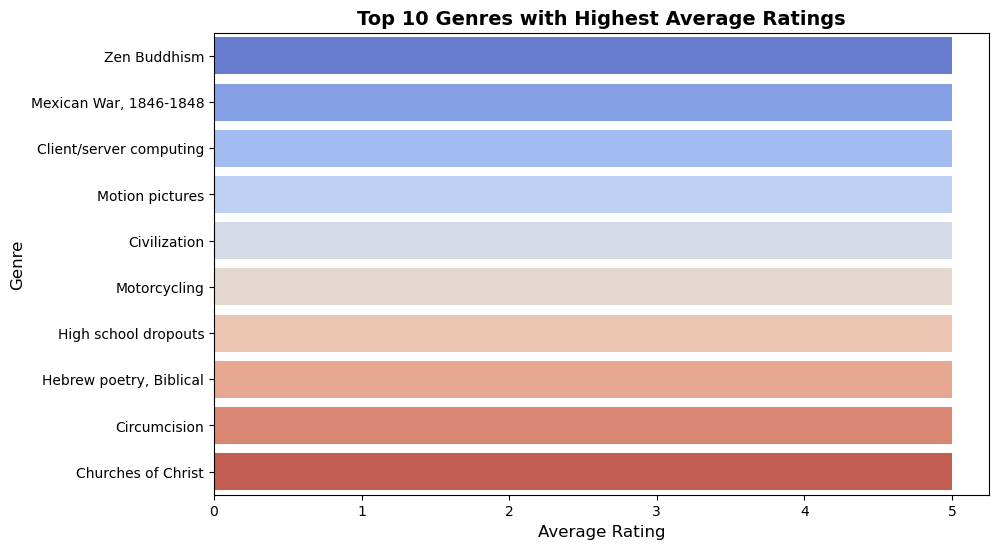

In [57]:
import ast  # safer than eval

# Drop rows with missing values
filtered_data = data.dropna(subset=['categories', 'review/score'])

# Convert string to list safely (only if it's a string)
filtered_data['categories'] = filtered_data['categories'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Explode list of genres into separate rows
exploded_data = filtered_data.explode('categories')

# Group by genre and get top 10 average ratings
genre_avg_rating = (
    exploded_data.groupby('categories')['review/score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot the top 10 genres with highest average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='coolwarm')
plt.title('Top 10 Genres with Highest Average Ratings', fontsize=14, weight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()



## 4. Initial Baseline Models

### Sentiment Classification

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

In [61]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['text_input'])
y = data['sentiment']

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Train/Val/Test Split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.30, stratify=y_resampled, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Baseline Model 1 – Logistic Regression

In [63]:
# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
print("Logistic Regression - Validation")
print(classification_report(y_val, lr.predict(X_val)))
print("Logistic Regression - Test")
print(classification_report(y_test, lr.predict(X_test)))

Logistic Regression - Validation
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.90      1787
     Neutral       0.87      0.88      0.88      1786
    Positive       0.87      0.85      0.86      1786

    accuracy                           0.88      5359
   macro avg       0.88      0.88      0.88      5359
weighted avg       0.88      0.88      0.88      5359

Logistic Regression - Test
              precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      1786
     Neutral       0.87      0.89      0.88      1787
    Positive       0.87      0.83      0.85      1787

    accuracy                           0.87      5360
   macro avg       0.87      0.87      0.87      5360
weighted avg       0.87      0.87      0.87      5360



### Baseline Model 2 – Multinomial Naive Bayes

In [65]:
# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("Naive Bayes - Validation")
print(classification_report(y_val, nb.predict(X_val)))
print("Naive Bayes - Test")
print(classification_report(y_test, nb.predict(X_test)))

Naive Bayes - Validation
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81      1787
     Neutral       0.79      0.78      0.79      1786
    Positive       0.80      0.80      0.80      1786

    accuracy                           0.80      5359
   macro avg       0.80      0.80      0.80      5359
weighted avg       0.80      0.80      0.80      5359

Naive Bayes - Test
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      1786
     Neutral       0.78      0.80      0.79      1787
    Positive       0.79      0.75      0.77      1787

    accuracy                           0.79      5360
   macro avg       0.79      0.79      0.79      5360
weighted avg       0.79      0.79      0.79      5360



### Baseline Model 3 – Random Forest

In [67]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest - Validation")
print(classification_report(y_val, rf.predict(X_val)))
print("Random Forest - Test")
print(classification_report(y_test, rf.predict(X_test)))

Random Forest - Validation
              precision    recall  f1-score   support

    Negative       0.97      0.92      0.95      1787
     Neutral       0.98      0.92      0.95      1786
    Positive       0.86      0.95      0.91      1786

    accuracy                           0.93      5359
   macro avg       0.94      0.93      0.93      5359
weighted avg       0.94      0.93      0.93      5359

Random Forest - Test
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1786
     Neutral       0.98      0.92      0.95      1787
    Positive       0.85      0.95      0.89      1787

    accuracy                           0.92      5360
   macro avg       0.93      0.92      0.92      5360
weighted avg       0.93      0.92      0.92      5360



### Confusion Matrix for All Baseline Models

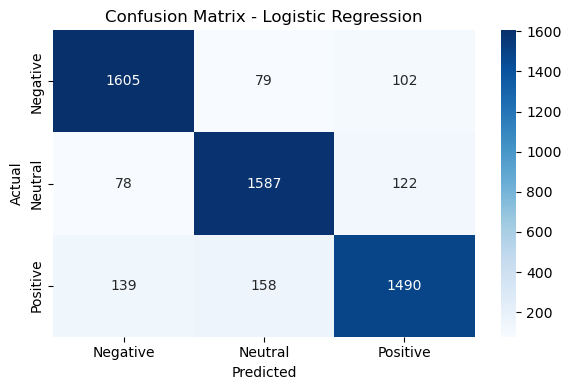

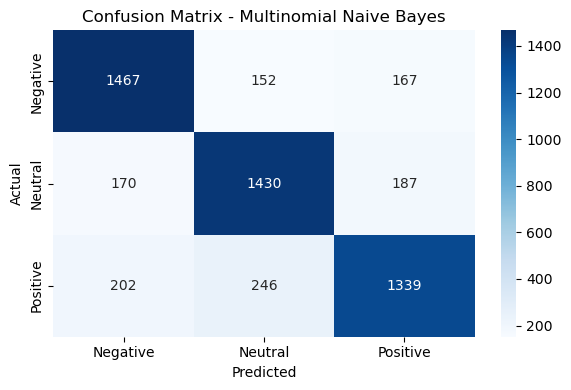

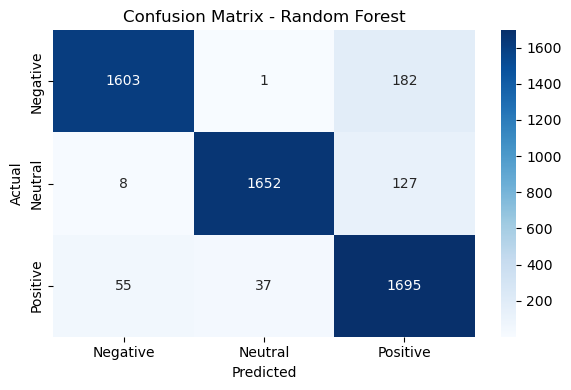

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Automatically detect unique labels from y_test
unique_labels = sorted(list(set(y_test)))  # Could be ['negative', 'neutral', 'positive'] or [0, 1, 2]

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_labels,
                yticklabels=unique_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Plot for each model
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_nb, "Multinomial Naive Bayes")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")



### Bar Graph for Accuracy, Precision, Recall, F1 (Baseline Models) for Sentiment Classification

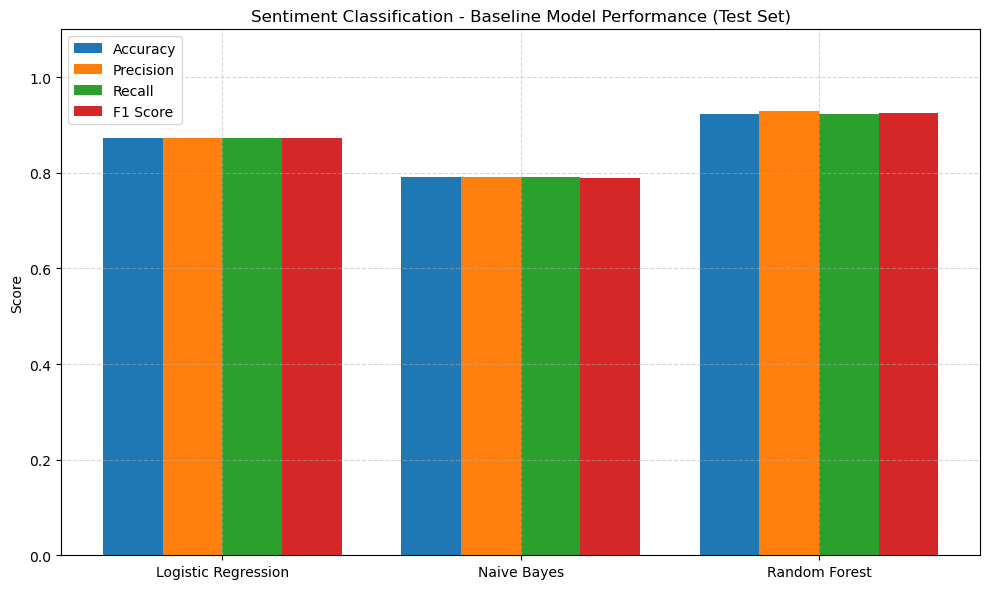

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions (already done)
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Compute metrics
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_lr, average='macro'),
    precision_score(y_test, y_pred_nb, average='macro'),
    precision_score(y_test, y_pred_rf, average='macro')
]
recalls = [
    recall_score(y_test, y_pred_lr, average='macro'),
    recall_score(y_test, y_pred_nb, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro')
]
f1s = [
    f1_score(y_test, y_pred_lr, average='macro'),
    f1_score(y_test, y_pred_nb, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

# Plot
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, f1s, width, label='F1 Score')

plt.ylabel('Score')
plt.title('Sentiment Classification - Baseline Model Performance (Test Set)')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Genre Classification

### Data Preprocessing (Top 50 Genres)

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("cleaned_sample_books.csv")

# Drop rows with null or Uncategorized genres
df = df[df['categories'].notnull()]
df = df[df['categories'] != 'Uncategorized']

# Filter genres with at least 50 samples
genre_counts = df['categories'].value_counts()
top_genres = genre_counts[genre_counts >= 50].index
df = df[df['categories'].isin(top_genres)]

# Combine title + review + author as input text
df['text_input'] = (
    df['Title'].fillna('') + ' ' +
    df['review/text'].fillna('') + ' ' +
    df['authors'].fillna('')
)

# Encode genre labels
label_encoder = LabelEncoder()
df['genre_label'] = label_encoder.fit_transform(df['categories'])

# TF-IDF vectorization (you can adjust max_features)
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['text_input'])
y = df['genre_label']

# Stratified 70/15/15 split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# Genre mapping
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(" Genres Used in Model:", genre_mapping)



 Genres Used in Model: {'Art': 0, 'Biography & Autobiography': 1, 'Body, Mind & Spirit': 2, 'Business & Economics': 3, 'Comics & Graphic Novels': 4, 'Computers': 5, 'Cooking': 6, 'Crafts & Hobbies': 7, 'Drama': 8, 'Education': 9, 'Family & Relationships': 10, 'Fiction': 11, 'Foreign Language Study': 12, 'Health & Fitness': 13, 'History': 14, 'Humor': 15, 'Juvenile Fiction': 16, 'Juvenile Nonfiction': 17, 'Language Arts & Disciplines': 18, 'Literary Criticism': 19, 'Medical': 20, 'Music': 21, 'Nature': 22, 'Performing Arts': 23, 'Pets': 24, 'Philosophy': 25, 'Poetry': 26, 'Political Science': 27, 'Psychology': 28, 'Reference': 29, 'Religion': 30, 'Science': 31, 'Self-Help': 32, 'Social Science': 33, 'Sports & Recreation': 34, 'Technology & Engineering': 35, 'Travel': 36, 'True Crime': 37, 'Young Adult Fiction': 38}


### 1. Multinomial Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

print(" Naive Bayes - Validation")
print(classification_report(y_val, nb.predict(X_val)))

print(" Naive Bayes - Test")
print(classification_report(y_test, nb.predict(X_test)))



 Naive Bayes - Validation
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.67      0.02      0.05        84
           2       0.00      0.00      0.00        25
           3       0.67      0.15      0.24        54
           4       0.00      0.00      0.00        12
           5       1.00      0.08      0.15        36
           6       1.00      0.04      0.08        23
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        21
          11       0.40      1.00      0.57       578
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        23
          14       0.27      0.04      0.07        73
          15       0.00      0.00      0.00         9
          16       0.92      0.16      0.27       138
 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\s

### 2. Logistic Regression Model

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=2000, solver='saga', random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)

print(" Logistic Regression - Validation")
print(classification_report(y_val, lr.predict(X_val)))

print(" Logistic Regression - Test")
print(classification_report(y_test, lr.predict(X_test)))




 Logistic Regression - Validation
              precision    recall  f1-score   support

           0       0.16      0.30      0.21        10
           1       0.35      0.35      0.35        84
           2       0.19      0.20      0.20        25
           3       0.80      0.59      0.68        54
           4       0.21      0.50      0.29        12
           5       0.79      0.64      0.71        36
           6       0.86      0.83      0.84        23
           7       0.29      0.40      0.33        10
           8       0.40      0.73      0.52        11
           9       0.11      0.12      0.12        16
          10       0.27      0.57      0.36        21
          11       0.83      0.36      0.50       578
          12       0.46      0.55      0.50        11
          13       0.44      0.52      0.48        23
          14       0.34      0.47      0.39        73
          15       0.14      0.44      0.21         9
          16       0.51      0.52      0.52    

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 3. Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

print(" Random Forest - Validation")
print(classification_report(y_val, rf.predict(X_val)))

print(" Random Forest - Test")
print(classification_report(y_test, rf.predict(X_test)))


 Random Forest - Validation
              precision    recall  f1-score   support

           0       0.15      0.30      0.20        10
           1       0.21      0.05      0.08        84
           2       0.25      0.12      0.16        25
           3       0.32      0.22      0.26        54
           4       0.27      0.33      0.30        12
           5       0.58      0.42      0.48        36
           6       0.61      0.87      0.71        23
           7       0.15      0.20      0.17        10
           8       0.32      0.64      0.42        11
           9       0.10      0.06      0.08        16
          10       0.30      0.29      0.29        21
          11       0.55      0.74      0.64       578
          12       0.36      0.36      0.36        11
          13       0.38      0.35      0.36        23
          14       0.31      0.21      0.25        73
          15       0.00      0.00      0.00         9
          16       0.44      0.25      0.32       138

### Plot Confusion Matrices Of Each Model for Genre Classifcation

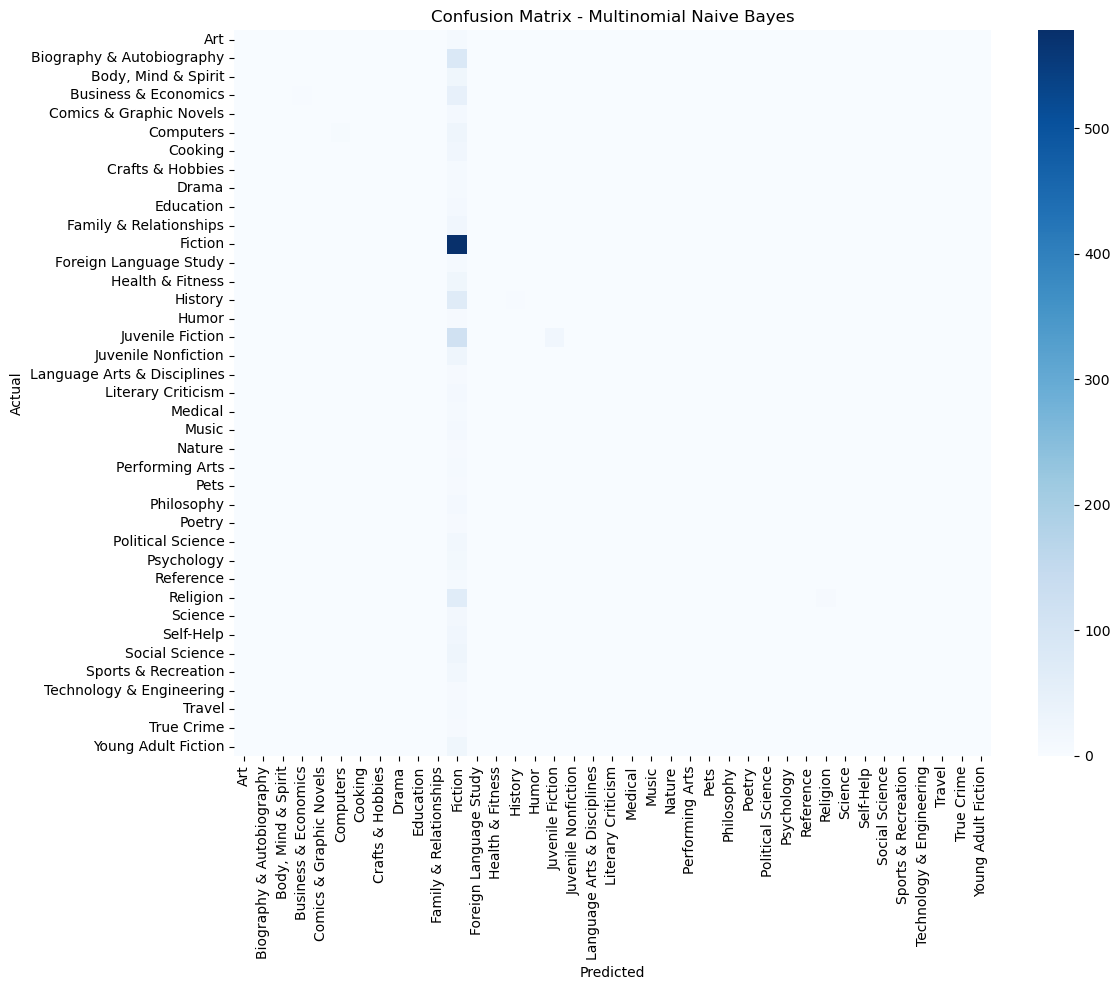

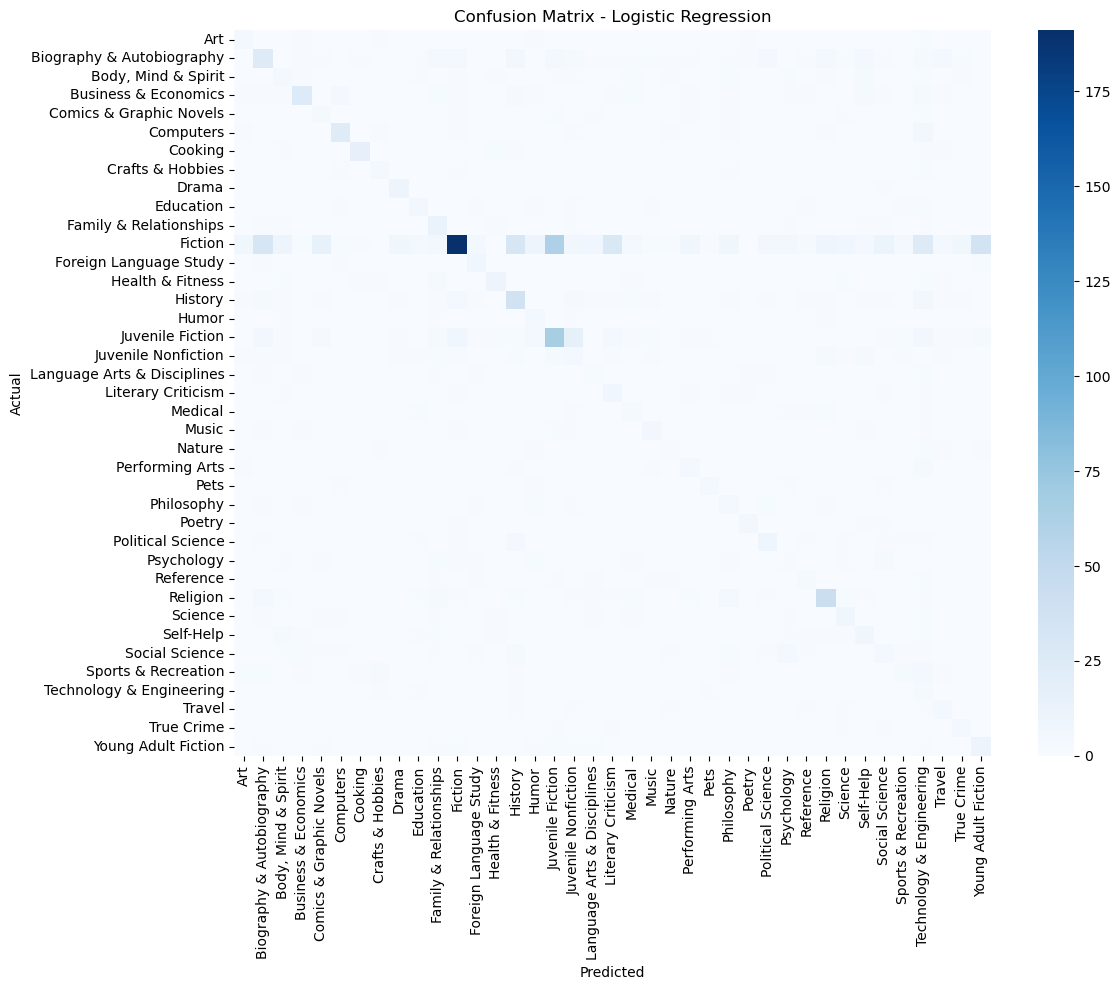

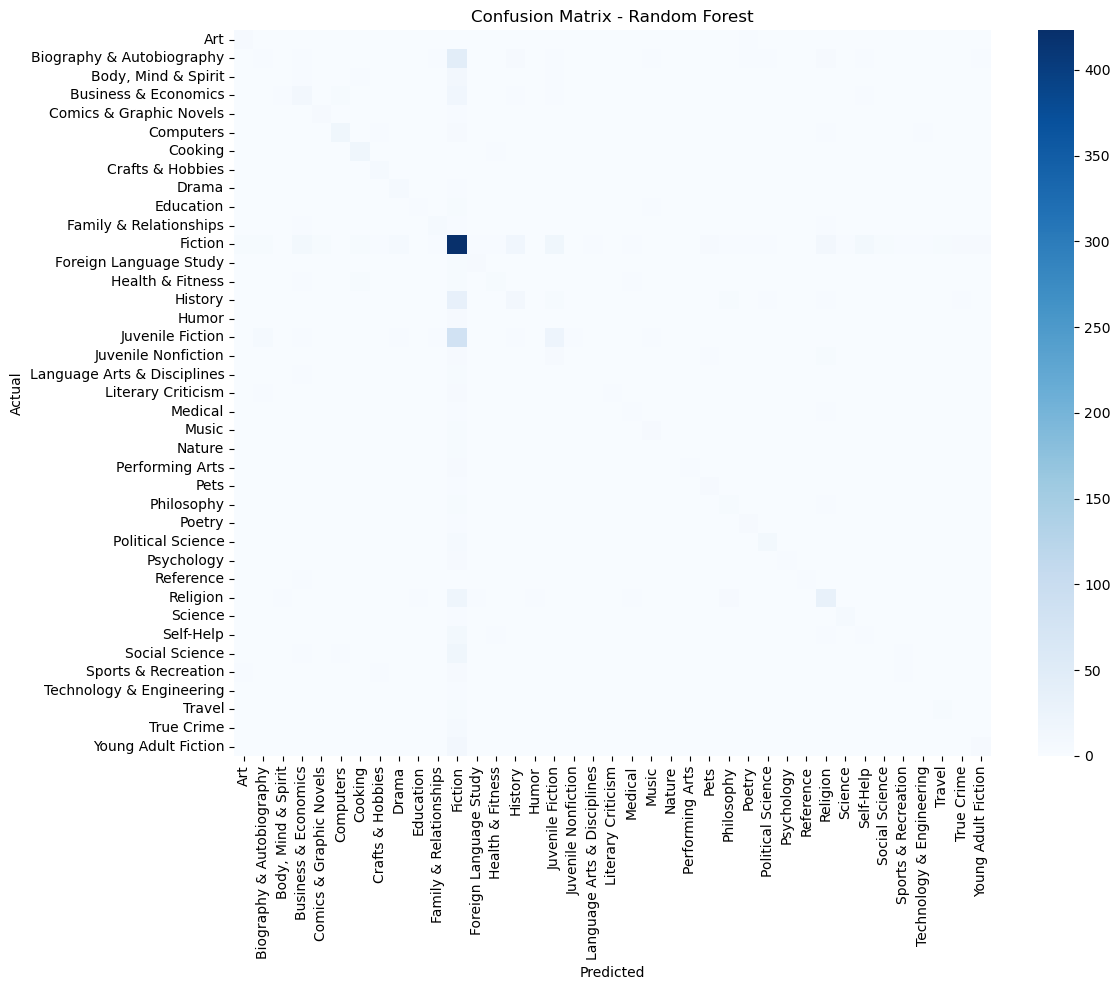

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Helper function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, cmap='Blues', fmt='d',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                annot=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Predict on test set
y_pred_nb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_nb, "Multinomial Naive Bayes")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Function to compute evaluation scores
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'f1_score': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

# Collect metrics
nb_metrics = get_metrics(y_test, y_pred_nb)
lr_metrics = get_metrics(y_test, y_pred_lr)
rf_metrics = get_metrics(y_test, y_pred_rf)

# Plot all metrics
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']




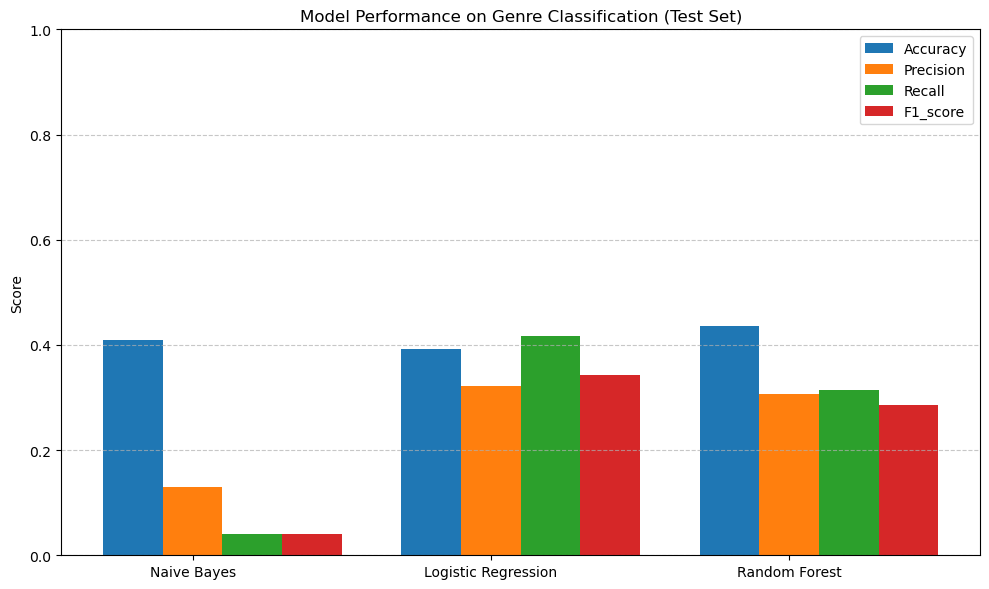

In [83]:
# Prepare data
scores = {
    'accuracy': [nb_metrics['accuracy'], lr_metrics['accuracy'], rf_metrics['accuracy']],
    'precision': [nb_metrics['precision'], lr_metrics['precision'], rf_metrics['precision']],
    'recall': [nb_metrics['recall'], lr_metrics['recall'], rf_metrics['recall']],
    'f1_score': [nb_metrics['f1_score'], lr_metrics['f1_score'], rf_metrics['f1_score']]
}

# Plot bar charts
x = np.arange(len(models))  # label locations
width = 0.2  # bar width

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, scores[metric], width=width, label=metric.capitalize())

plt.ylabel('Score')
plt.title('Model Performance on Genre Classification (Test Set)')
plt.xticks(x + width, models)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Compute Metrics and Plot Comparison Graph

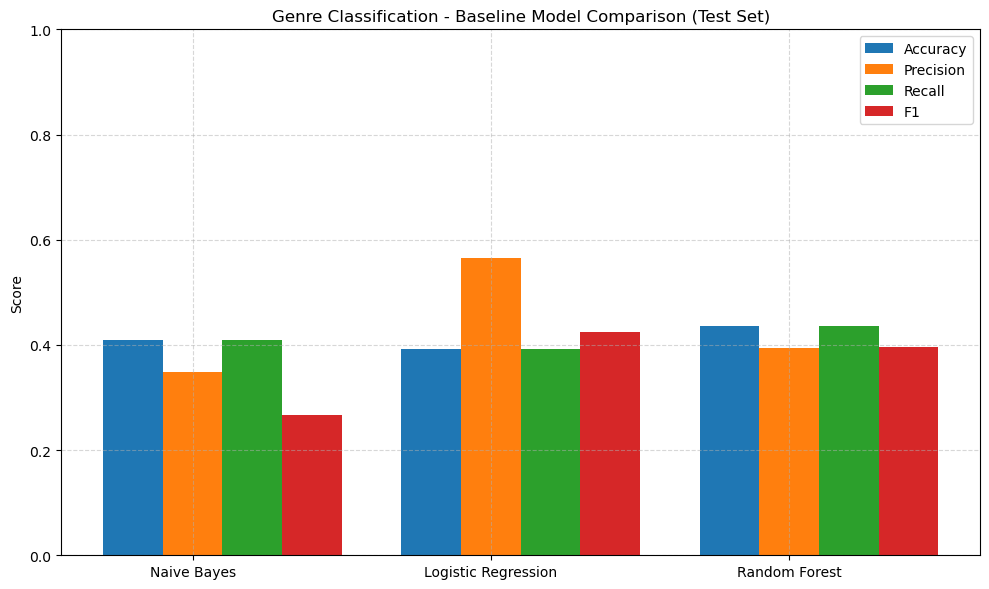

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred_nb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Compute metrics
def get_scores(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

scores = {
    'Naive Bayes': get_scores(y_test, y_pred_nb),
    'Logistic Regression': get_scores(y_test, y_pred_lr),
    'Random Forest': get_scores(y_test, y_pred_rf)
}

# Plot
labels = list(scores.keys())
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, [scores[model][metric] for model in labels], width, label=metric.capitalize())

plt.ylabel('Score')
plt.title('Genre Classification - Baseline Model Comparison (Test Set)')
plt.xticks(x + width, labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 5. Advanced Models 

In [87]:
pip install tensorflow scikit-learn imbalanced-learn


### Sentiment Classification

### MLNN 

In [90]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load cleaned dataset
data = pd.read_csv("cleaned_sample_books.csv")

# Combine features into single text input
data['text_input'] = (
    data['Title'].fillna('') + ' ' +
    data['review/text'].fillna('') + ' ' +
    data['authors'].fillna('')
)

# Map review score to sentiment label
def map_sentiment(score):
    if score <= 2.0:
        return 0  # Negative
    elif score == 3.0:
        return 1  # Neutral
    else:
        return 2  # Positive

data['sentiment'] = data['review/score'].apply(map_sentiment)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['text_input'])
y = data['sentiment']

# SMOTE to balance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# 70:15:15 Split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42, stratify=y_resampled)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# One-hot encoding
y_train_enc = to_categorical(y_train, num_classes=3)
y_val_enc = to_categorical(y_val, num_classes=3)
y_test_enc = to_categorical(y_test, num_classes=3)

# Build MLNN
mlnn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

mlnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_mlnn = mlnn.fit(
    X_train.toarray(), y_train_enc,
    validation_data=(X_val.toarray(), y_val_enc),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
loss, accuracy = mlnn.evaluate(X_test.toarray(), y_test_enc, verbose=0)
print(f"\n Test Accuracy: {accuracy:.4f} | Test Loss: {loss:.4f}")

# Predict on test set
y_test_pred_probs = mlnn.predict(X_test.toarray())
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = np.argmax(y_test_enc, axis=1)

# Classification report
print("\n Classification Report (Test Set):")
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test_true, y_test_pred, target_names=target_names))


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7079 - loss: 0.6919 - val_accuracy: 0.8998 - val_loss: 0.2796
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9405 - loss: 0.1819 - val_accuracy: 0.9321 - val_loss: 0.1948
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9798 - loss: 0.0661 - val_accuracy: 0.9435 - val_loss: 0.1737
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9923 - loss: 0.0286 - val_accuracy: 0.9444 - val_loss: 0.1847
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9567 - val_loss: 0.1662
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accuracy: 0.9491 - val_loss: 0.2031
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9474 - val_loss: 0.2284
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9953 - loss: 0.0127 - val_accuracy: 0.

### LSTM

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report

# Load and preprocess
data = pd.read_csv("cleaned_sample_books.csv")
data['text_input'] = data['Title'].fillna('') + ' ' + data['review/text'].fillna('') + ' ' + data['authors'].fillna('')

# Map sentiment
def map_sentiment(score):
    if score <= 2.0:
        return 0
    elif score == 3.0:
        return 1
    else:
        return 2

data['sentiment'] = data['review/score'].apply(map_sentiment)

# Oversample minority classes (before tokenization)
class_0 = data[data['sentiment'] == 0]
class_1 = data[data['sentiment'] == 1]
class_2 = data[data['sentiment'] == 2]

max_size = max(len(class_0), len(class_1), len(class_2))

class_0_upsampled = resample(class_0, replace=True, n_samples=max_size, random_state=42)
class_1_upsampled = resample(class_1, replace=True, n_samples=max_size, random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=max_size, random_state=42)

balanced_data = pd.concat([class_0_upsampled, class_1_upsampled, class_2_upsampled])
balanced_data = balanced_data.sample(frac=1, random_state=42)  # Shuffle

# Tokenize and pad
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(balanced_data['text_input'])
sequences = tokenizer.texts_to_sequences(balanced_data['text_input'])
X = pad_sequences(sequences, maxlen=100)
y = to_categorical(balanced_data['sentiment'], num_classes=3)

# Split 70:15:15
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=np.argmax(y, axis=1))
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1))

# LSTM Model (same structure as before)
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"\n Test Accuracy: {accuracy:.4f} | Test Loss: {loss:.4f}")
print("\n Classification Report (Test Set):")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.5578 - loss: 0.8891 - val_accuracy: 0.8832 - val_loss: 0.3408
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9286 - loss: 0.2250 - val_accuracy: 0.9515 - val_loss: 0.1632
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9662 - loss: 0.1111 - val_accuracy: 0.9601 - val_loss: 0.1459
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9823 - loss: 0.0587 - val_accuracy: 0.9614 - val_loss: 0.1414
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.9846 - loss: 0.0529 - val_accuracy: 0.9631 - val_loss: 0.1464
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.9715 - val_loss: 0.1290
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9741 - val_loss: 0.1360
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9920 - loss: 0.0278 - val_accurac

### FNN 

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Step 1: Load and Combine Text
data = pd.read_csv("cleaned_sample_books.csv")
data['text_input'] = (
    data['Title'].fillna('') + ' ' +
    data['review/text'].fillna('') + ' ' +
    data['authors'].fillna('')
)

# Step 2: Derive Sentiment Labels from 'review/score'
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['review/score'].apply(score_to_sentiment)

# Step 3: Encode Target Labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])
y = data['sentiment_encoded']
y_encoded = to_categorical(y, num_classes=3)

# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=7000)
X = vectorizer.fit_transform(data['text_input'])

# Step 5: Balance Classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled_cat = to_categorical(y_resampled, num_classes=3)

# Step 6: Train-Validation-Test Split (70:15:15)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_resampled, y_resampled_cat, test_size=0.15, random_state=42, stratify=y_resampled)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42,
    stratify=np.argmax(y_temp, axis=1))

# Step 7: Compute Class Weights
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Step 8: Build FNN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history_fnn = model.fit(
    X_train.toarray(), y_train,
    validation_data=(X_val.toarray(), y_val),
    epochs=30,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)


# Step 10: Evaluation Function
def evaluate_model(model, X, y, title="FNN"):
    loss, acc = model.evaluate(X.toarray(), y, verbose=0)
    y_pred = np.argmax(model.predict(X.toarray()), axis=1)
    y_true = np.argmax(y, axis=1)
    print(f"\n{title} - Accuracy: {acc:.4f} | Loss: {loss:.4f}")
    print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive'], digits=2))

# Step 11: Show Results
evaluate_model(model, X_val, y_val, "FNN - Validation")
evaluate_model(model, X_test, y_test, "FNN - Test")


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class Weights: {0: 0.9999200351845188, 1: 1.0000399872040946, 2: 1.0000399872040946}
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.5711 - loss: 0.8919 - val_accuracy: 0.9125 - val_loss: 0.6326
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9204 - loss: 0.2336 - val_accuracy: 0.9545 - val_loss: 0.1332
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9721 - loss: 0.0848 - val_accuracy: 0.9618 - val_loss: 0.1072
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9892 - loss: 0.0371 - val_accuracy: 0.9634 - val_loss: 0.1107
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.9627 - val_loss: 0.1191
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9958 - loss: 0.0143 - val_accuracy: 0.9646 - val_loss: 0.1249
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9958 - loss: 0.0116 - val_accuracy: 0.9631 - val_loss: 0.1370
168/1

### Plotting Confusion Matrices for the 3 Advanced Models

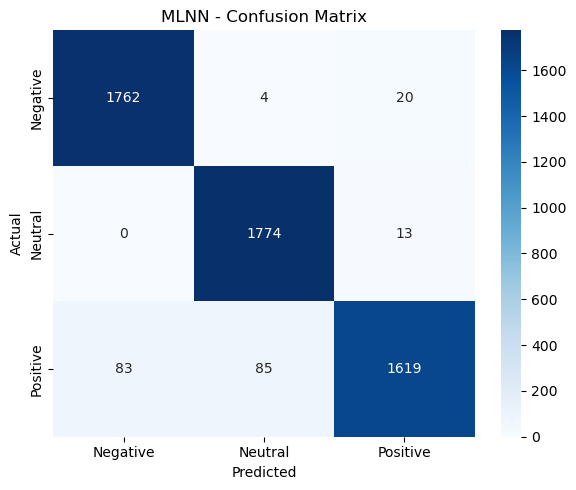

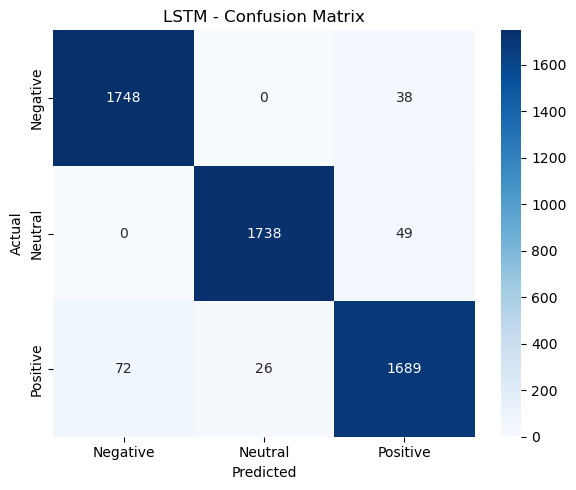

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


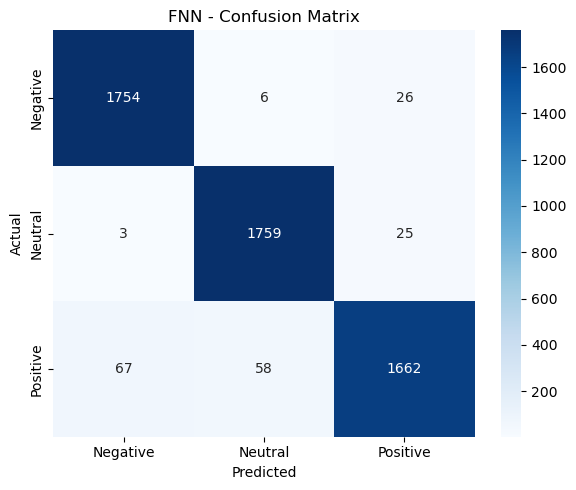

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# For MLNN
plot_conf_matrix(y_test_true, y_test_pred, "MLNN")

# For LSTM
plot_conf_matrix(y_true, y_pred, "LSTM")

# For FNN
y_fnn_true = np.argmax(y_test, axis=1)
y_fnn_pred = np.argmax(model.predict(X_test.toarray()), axis=1)
plot_conf_matrix(y_fnn_true, y_fnn_pred, "FNN")



###  Plot Training Accuracy & Loss for Each Model

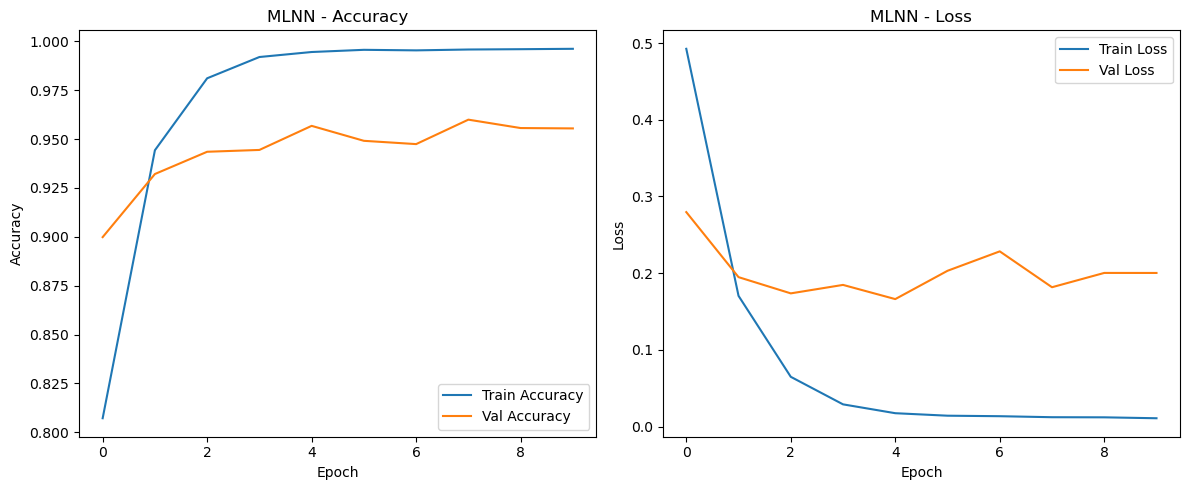

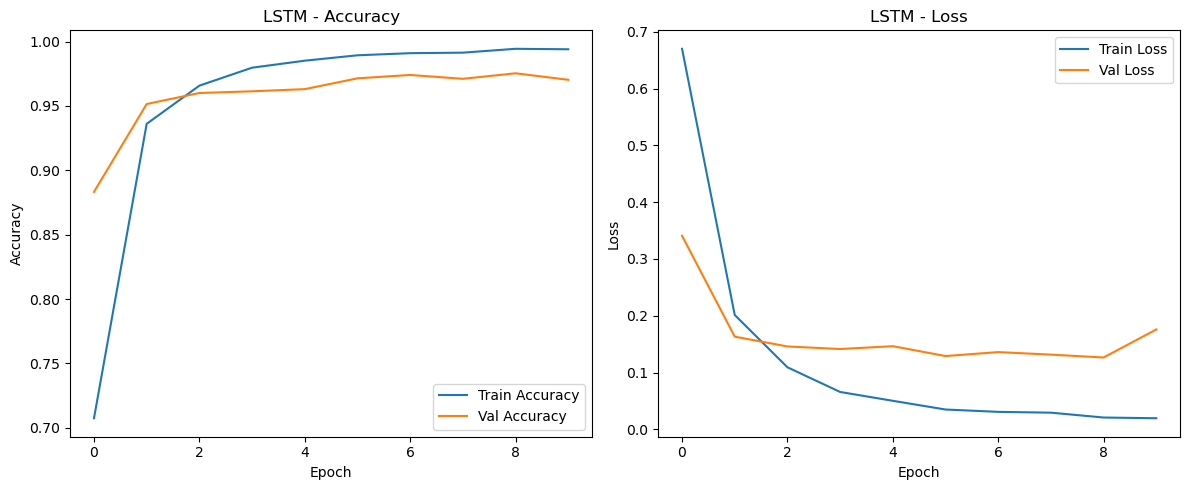

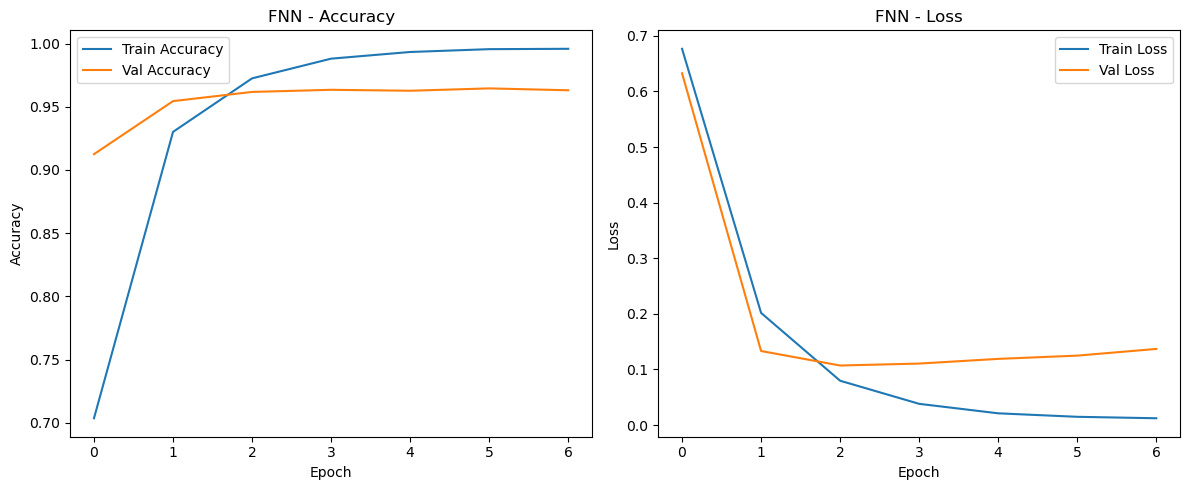

In [98]:
import matplotlib.pyplot as plt

def plot_training(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for each model
plot_training(history_mlnn, "MLNN")
plot_training(history_lstm, "LSTM")
plot_training(history_fnn, "FNN")


### Genre Classification

### Preprocessing Data


In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load & filter top 50 genres
df = pd.read_csv("cleaned_sample_books.csv")
df = df[df['categories'].notnull()]
df = df[df['categories'] != 'Uncategorized']
top_50_genres = df['categories'].value_counts().nlargest(50).index
df = df[df['categories'].isin(top_50_genres)]

# Combine text
df['text_input'] = (
    df['Title'].fillna('') + ' ' +
    df['review/text'].fillna('') + ' ' +
    df['authors'].fillna('')
)

# Label encode
label_encoder = LabelEncoder()
df['genre_label'] = label_encoder.fit_transform(df['categories'])

X_text = df['text_input'].values
y = df['genre_label'].values

# Stratified split 70/15/15
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.15, stratify=y, random_state=42)

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train_text, y_train, test_size=0.1765, stratify=y_train, random_state=42)

# Get class weights (as dict)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))


#### MLNN

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# TF-IDF for MLNN/FNN
vectorizer = TfidfVectorizer(max_features=3000)
X_train_dense = vectorizer.fit_transform(X_train_text).toarray()
X_val_dense = vectorizer.transform(X_val_text).toarray()
X_test_dense = vectorizer.transform(X_test_text).toarray()

# MLNN model
mlnn = Sequential([
    Dense(512, activation='relu', input_shape=(3000,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='softmax')
])

mlnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mlnn=mlnn.fit(X_train_dense, y_train, epochs=10, batch_size=64, validation_data=(X_val_dense, y_val), class_weight=class_weight_dict)

# Evaluation
from sklearn.metrics import classification_report
y_pred_val = mlnn.predict(X_val_dense).argmax(axis=1)
print("MLNN - Validation Results\n", classification_report(y_val, y_pred_val, target_names=label_encoder.classes_))

y_pred_test = mlnn.predict(X_test_dense).argmax(axis=1)
print("MLNN - Test Results\n", classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))




Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0646 - loss: 3.8742 - val_accuracy: 0.2102 - val_loss: 3.7466
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2524 - loss: 3.6346 - val_accuracy: 0.3399 - val_loss: 3.0150
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3833 - loss: 2.3649 - val_accuracy: 0.3610 - val_loss: 2.5856
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4869 - loss: 1.2833 - val_accuracy: 0.3904 - val_loss: 2.3801
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5860 - loss: 0.6939 - val_accuracy: 0.3796 - val_loss: 2.2666
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6565 - loss: 0.4189 - val_accuracy: 0.4447 - val_loss: 2.0864
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7166 - loss: 0.2680 - val_accuracy: 0.4537 - val_loss: 2.0690
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7448 - loss: 0.2157 - val_accuracy: 0.486

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MLNN - Test Results
                                precision    recall  f1-score   support

            Adventure stories       0.40      0.67      0.50         6
          American literature       0.12      0.25      0.17         4
      Antiques & Collectibles       1.00      0.33      0.50         3
                          Art       0.16      0.30      0.21        10
                   Audiobooks       0.33      0.33      0.33         3
                       Bibles       0.57      0.80      0.67         5
    Biography & Autobiography       0.26      0.43      0.32        84
          Body, Mind & Spirit       0.23      0.29      0.25        24
         Business & Economics       0.56      0.61      0.58        54
      Comics & Graphic Novels       0.43      0.25      0.32        12
                    Computers       0.67      0.67      0.67        36
                      Cooking       0.80      0.70      0.74        23
             Cra

### LSTM (Using Tokenizer and Padded Sequences)

In [106]:
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_val_seq = tokenizer.texts_to_sequences(X_val_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=300)
X_val_pad = pad_sequences(X_val_seq, maxlen=300)
X_test_pad = pad_sequences(X_test_seq, maxlen=300)

vocab_size = len(tokenizer.word_index) + 1

from tensorflow.keras.layers import Embedding, LSTM

lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(50, activation='softmax')
])

lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm.fit(np.array(X_train_pad), y_train, epochs=5, batch_size=64, validation_data=(np.array(X_val_pad), y_val), class_weight=class_weight_dict)

y_pred_val = lstm.predict(X_val_pad).argmax(axis=1)
print("LSTM - Validation Results\n", classification_report(y_val, y_pred_val, target_names=label_encoder.classes_))

y_pred_test = lstm.predict(X_test_pad).argmax(axis=1)
print("LSTM - Test Results\n", classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))



Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 60s 490ms/step - accuracy: 0.0383 - loss: 3.9021 - val_accuracy: 0.1597 - val_loss: 3.8851
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 491ms/step - accuracy: 0.1259 - loss: 3.9379 - val_accuracy: 0.0639 - val_loss: 3.9321
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 487ms/step - accuracy: 0.2017 - loss: 3.4366 - val_accuracy: 0.2026 - val_loss: 3.4449
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 490ms/step - accuracy: 0.3416 - loss: 2.8474 - val_accuracy: 0.2920 - val_loss: 3.0722
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 56s 489ms/step - accuracy: 0.4606 - loss: 1.9730 - val_accuracy: 0.3016 - val_loss: 3.1116
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step
LSTM - Validation Results
                                precision    recall  f1-score   support

            Adventure stories       0.50      0.43      0.46         7
          American literature       0.20      0.25      0.22         4
      Antiques & Collectibles       0.04      0.25      0.06        

### FNN

In [108]:
fnn = Sequential([
    Dense(256, activation='relu', input_shape=(3000,)),
    Dropout(0.2),
    Dense(50, activation='softmax')
])

fnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_fnn = fnn.fit(X_train_dense, y_train, epochs=10, batch_size=64, validation_data=(X_val_dense, y_val), class_weight=class_weight_dict)

y_pred_val = fnn.predict(X_val_dense).argmax(axis=1)
print("FNN - Validation Results\n", classification_report(y_val, y_pred_val, target_names=label_encoder.classes_))

y_pred_test = fnn.predict(X_test_dense).argmax(axis=1)
print("FNN - Test Results\n", classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))




Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0597 - loss: 4.0141 - val_accuracy: 0.4383 - val_loss: 3.7398
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5359 - loss: 3.5410 - val_accuracy: 0.4288 - val_loss: 3.4243
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5520 - loss: 2.9471 - val_accuracy: 0.4447 - val_loss: 2.9715
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6218 - loss: 2.2012 - val_accuracy: 0.4645 - val_loss: 2.6820
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6365 - loss: 1.5433 - val_accuracy: 0.4716 - val_loss: 2.4082
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6680 - loss: 1.1436 - val_accuracy: 0.4805 - val_loss: 2.2656
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6941 - loss: 0.8086 - val_accuracy: 0.5048 - val_loss: 2.1095
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7290 - loss: 0.6009 - val_accuracy: 0.4690 - val

### Confusion Matrices For Advanced Models for Genre Classification

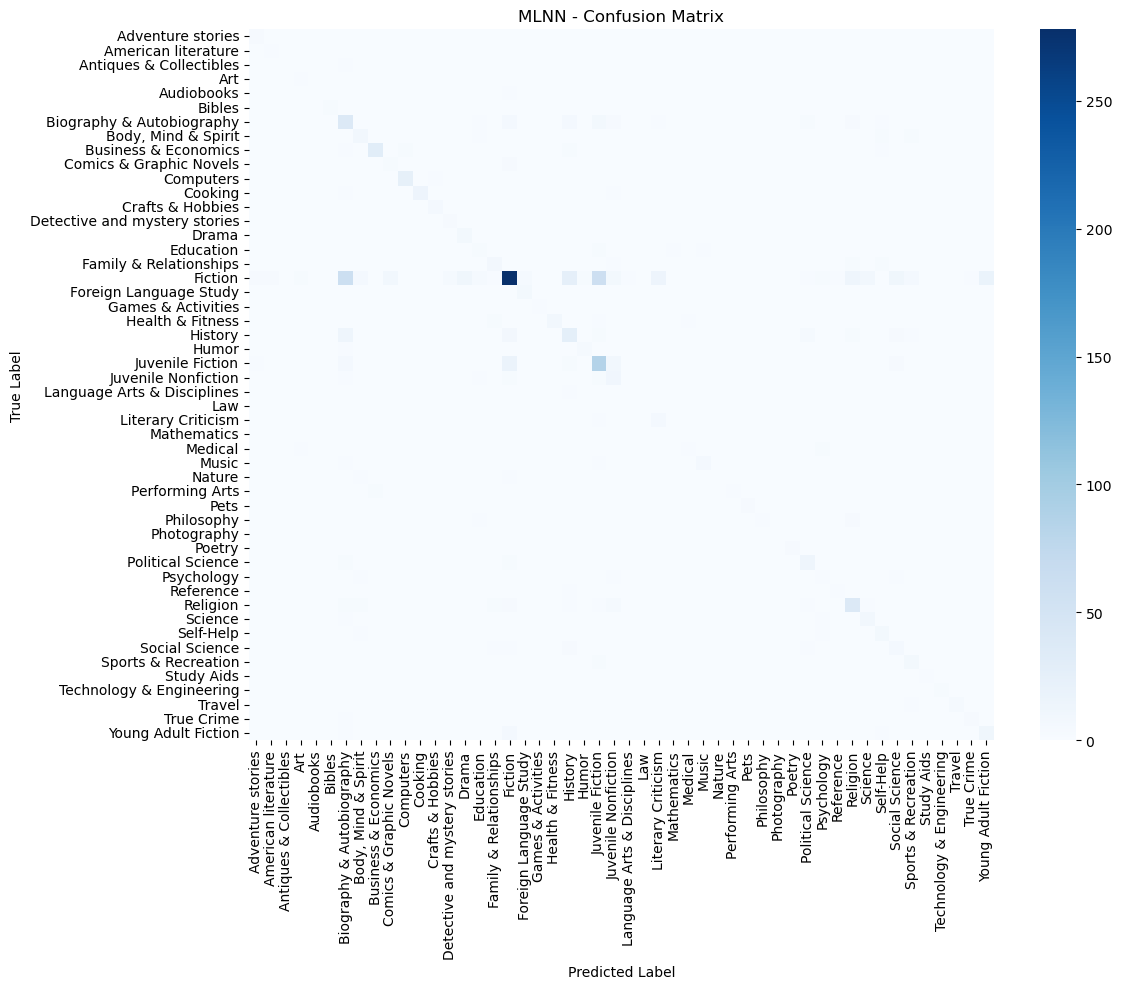

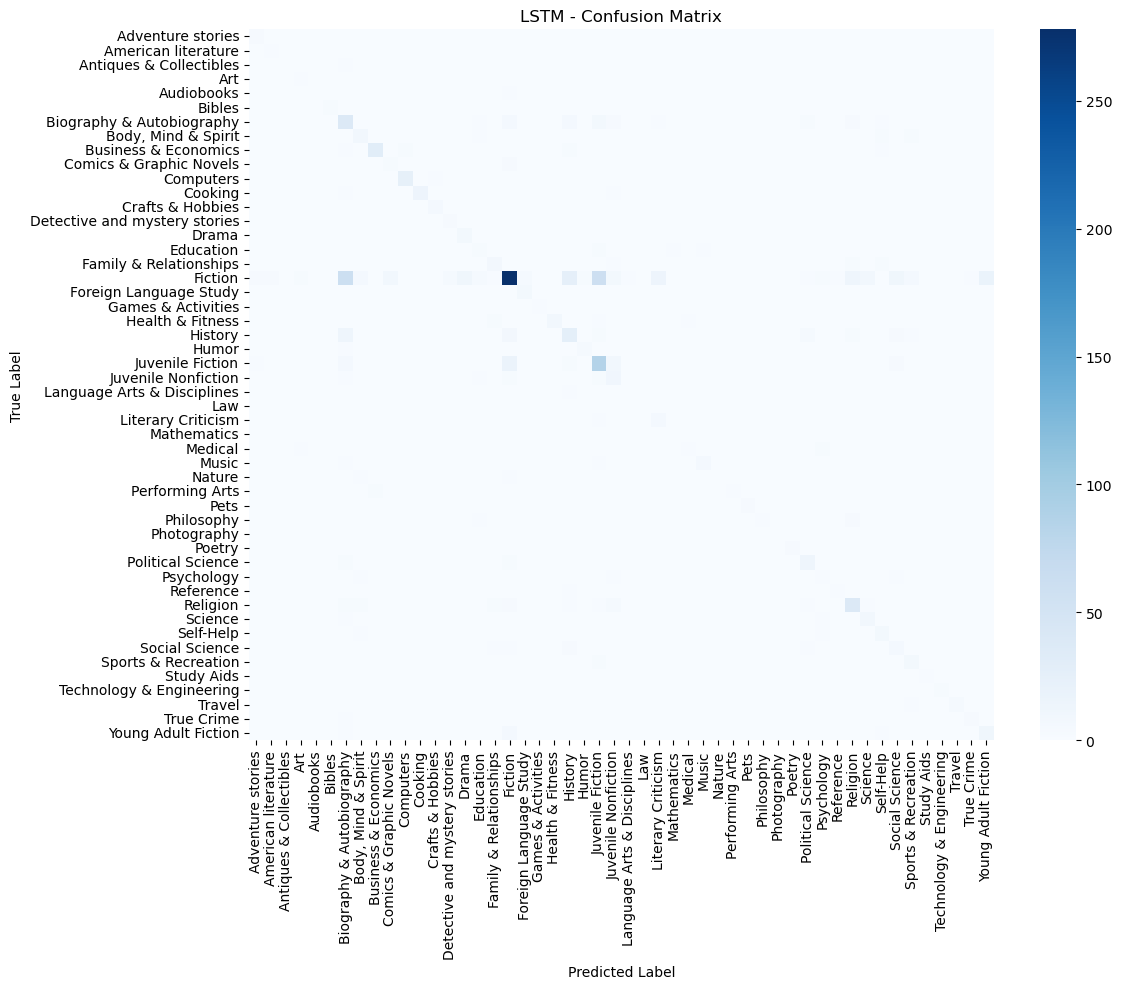

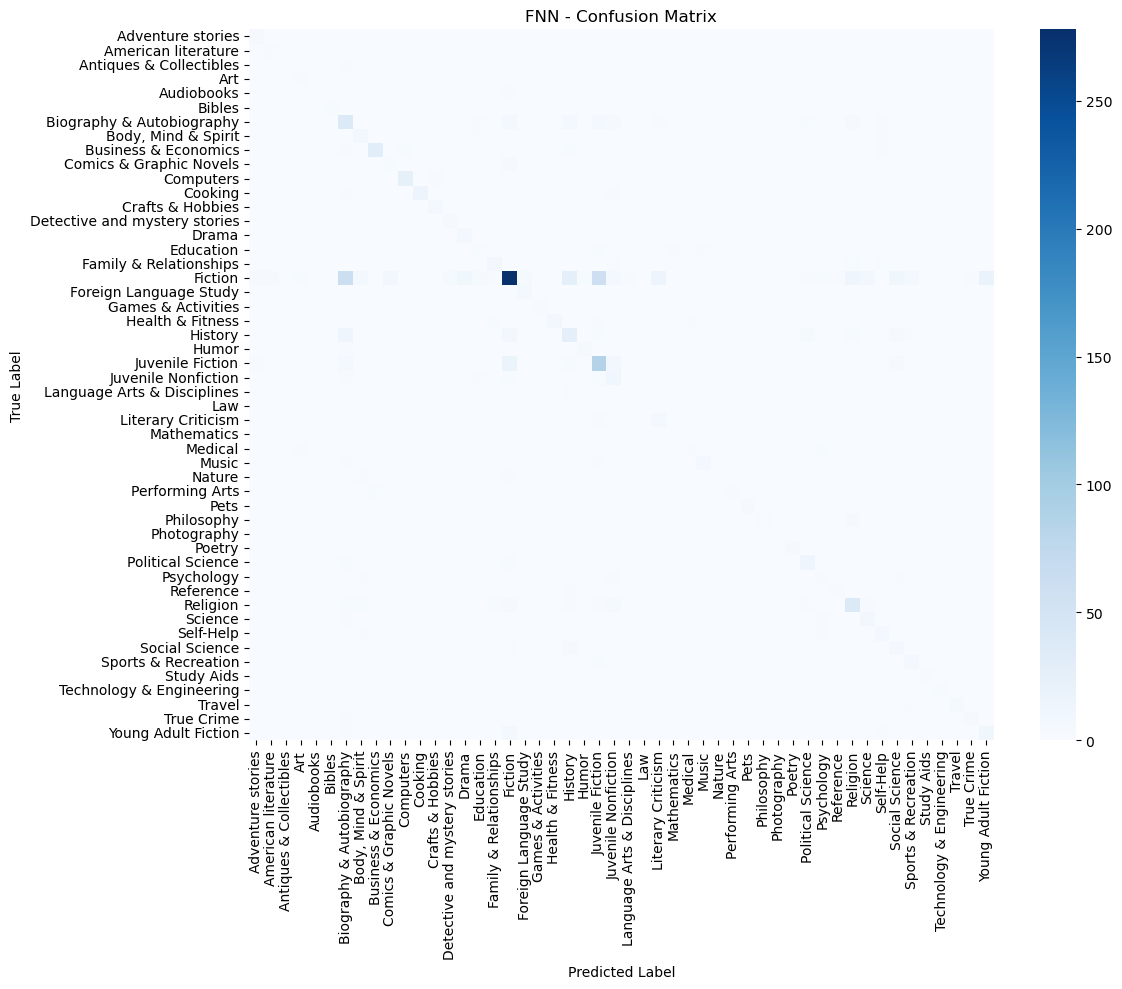

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot Confusion Matrices
plot_conf_matrix(y_test, y_pred_test, "MLNN")
plot_conf_matrix(y_test, y_pred_test, "LSTM")
plot_conf_matrix(y_test, y_pred_test, "FNN")


### Plot Training Loss and Accuracy for the 3 Advanced Models for Genre Classification

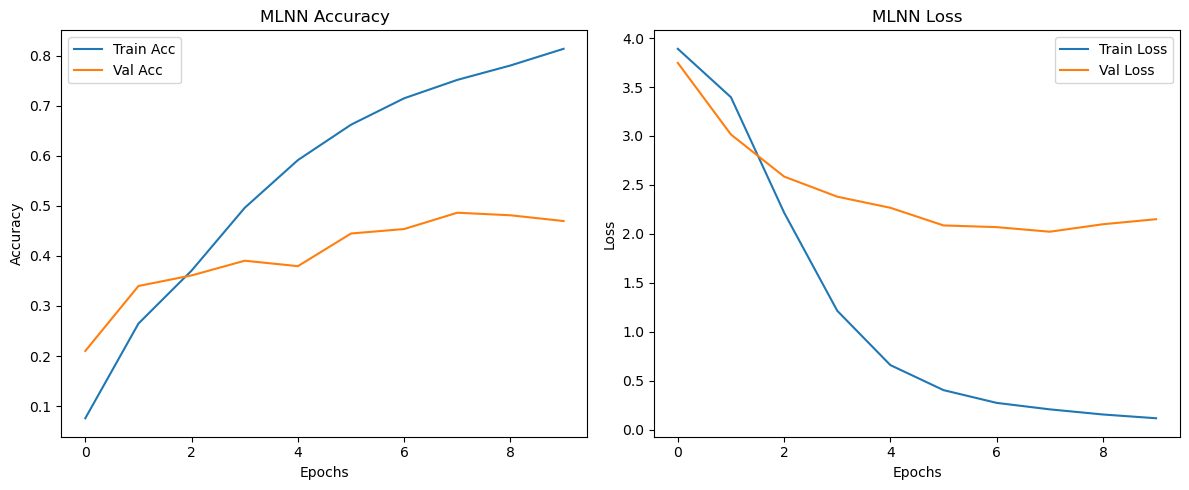

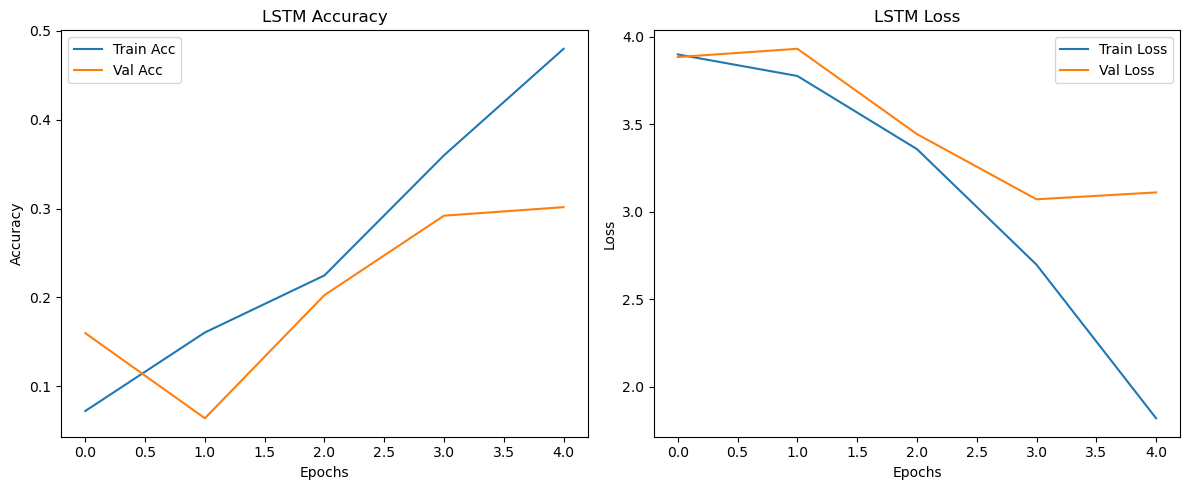

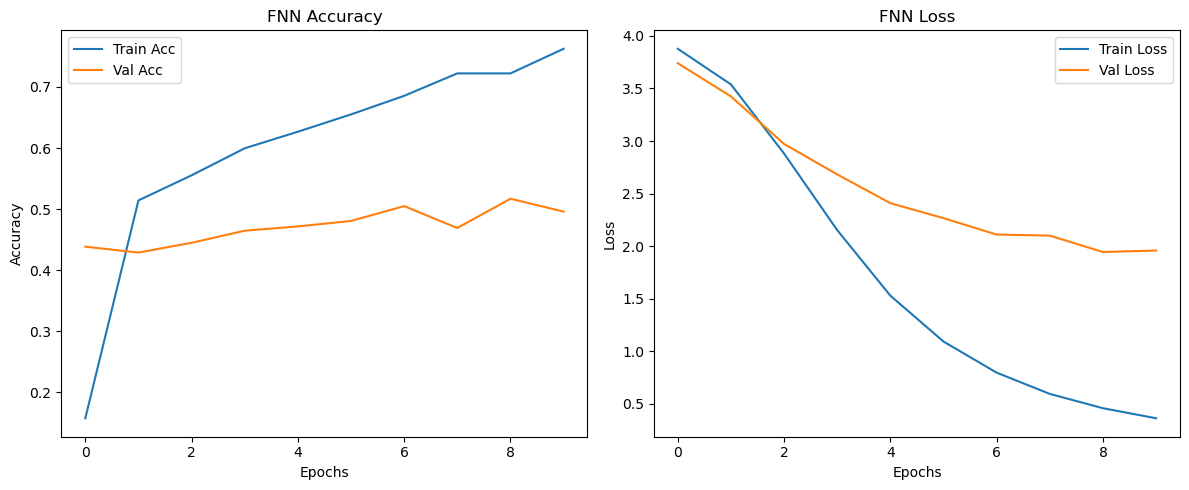

In [112]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot graphs for each
plot_training_history(history_mlnn, "MLNN")
plot_training_history(history_lstm, "LSTM")
plot_training_history(history_fnn, "FNN")


## 6. Hybrid Models 

### Hybrid Model 1 : LSTM + MLNN

### Sentiment Classification

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# --- Load Data ---
data = pd.read_csv("cleaned_sample_books.csv")

# --- Combine Relevant Text Fields ---
data['text_input'] = (
    data['Title'].fillna('') + ' ' +
    data['review/text'].fillna('') + ' ' +
    data['authors'].fillna('')
)

# --- Map 'review/score' to Sentiment Labels ---
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['review/score'].apply(score_to_sentiment)

# --- Encode Sentiment Labels ---
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])
y = data['sentiment_encoded']
y_encoded = to_categorical(y, num_classes=3)

# --- Tokenization and Padding for LSTM ---
tokenizer = Tokenizer(num_words=7000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text_input'])
sequences = tokenizer.texts_to_sequences(data['text_input'])
X_pad = pad_sequences(sequences, maxlen=300, padding='post')

# --- TF-IDF Vectorization for MLNN ---
vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(data['text_input']).toarray()

# --- Balance Classes using SMOTE ---
smote = SMOTE(random_state=42)
X_resampled_pad, y_resampled = smote.fit_resample(X_pad, y)
X_resampled_tfidf, _ = smote.fit_resample(X_tfidf, y)
y_resampled_cat = to_categorical(y_resampled, num_classes=3)

# --- Train-Validation-Test Split (70% Train, 15% Validation, 15% Test) ---
X_train_pad, X_temp_pad, y_train, y_temp = train_test_split(
    X_resampled_pad, y_resampled_cat, test_size=0.3, random_state=42, stratify=y_resampled)

X_val_pad, X_test_pad, y_val, y_test = train_test_split(
    X_temp_pad, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(
    X_resampled_tfidf, y_resampled_cat, test_size=0.3, random_state=42, stratify=y_resampled)

X_val_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_temp_tfidf, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))

# --- Compute Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- LSTM Branch ---
input_lstm = Input(shape=(X_train_pad.shape[1],))
embedding = Embedding(input_dim=7000, output_dim=128)(input_lstm)
lstm = Bidirectional(LSTM(64))(embedding)
lstm_branch = Model(inputs=input_lstm, outputs=lstm)

# --- MLNN Branch ---
input_mlnn = Input(shape=(X_train_tfidf.shape[1],))
dense1 = Dense(512, activation='relu')(input_mlnn)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(256, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)
mlnn_branch = Model(inputs=input_mlnn, outputs=drop2)

# --- Combine Branches ---
combined = Concatenate()([lstm_branch.output, mlnn_branch.output])
batch_norm = BatchNormalization()(combined)
dense3 = Dense(128, activation='relu')(batch_norm)
drop3 = Dropout(0.4)(dense3)
output = Dense(3, activation='softmax')(drop3)

# --- Training ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# After compiling your sentiment model
model_sentiment = Model(inputs=[lstm_branch.input, mlnn_branch.input], outputs=output)
model_sentiment.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history_hybrid_sentiment = model_sentiment.fit(
    [X_train_pad, X_train_tfidf], y_train,
    validation_data=([X_val_pad, X_val_tfidf], y_val),
    epochs=25,
    batch_size=128,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)
from sklearn.metrics import classification_report

# --- Evaluation ---
y_pred_probs = model.predict([X_test_pad, X_test_tfidf])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n Hybrid LSTM + MLNN Sentiment Classification Results:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 691ms/step - accuracy: 0.6870 - loss: 0.6814 - val_accuracy: 0.8996 - val_loss: 0.7173
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 685ms/step - accuracy: 0.9582 - loss: 0.1264 - val_accuracy: 0.9517 - val_loss: 0.2022
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 732ms/step - accuracy: 0.9838 - loss: 0.0499 - val_accuracy: 0.9539 - val_loss: 0.1417
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 719ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9563 - val_loss: 0.1460
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 722ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9603 - val_loss: 0.1590
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 720ms/step - accuracy: 0.9924 - loss: 0.0203 - val_accuracy: 0.9395 - val_loss: 0.3121
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step

 Hybrid LSTM + MLNN Sentiment Classification Results:
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97      1786
  

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Print Summary Metrics ---
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\nFinal Evaluation Metrics (LSTM + MLNN - Sentiment):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")



Final Evaluation Metrics (LSTM + MLNN - Sentiment):
Accuracy : 0.9588
Precision: 0.9598
Recall   : 0.9588
F1 Score : 0.9590


### Genre Classification

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load Data ---
df = pd.read_csv("cleaned_sample_books.csv")

# --- Filter Top 50 Genres ---
df = df[df['categories'].notnull()]
df = df[df['categories'] != 'Uncategorized']
top_50_genres = df['categories'].value_counts().nlargest(50).index
df = df[df['categories'].isin(top_50_genres)]

# --- Combine Relevant Text Fields ---
df['text_input'] = (
    df['Title'].fillna('') + ' ' +
    df['review/text'].fillna('') + ' ' +
    df['authors'].fillna('')
)

# --- Encode Genre Labels ---
label_encoder = LabelEncoder()
df['genre_label'] = label_encoder.fit_transform(df['categories'])
y = df['genre_label'].values
y_encoded = to_categorical(y, num_classes=len(top_50_genres))

# --- Tokenization and Padding for LSTM ---
tokenizer = Tokenizer(num_words=7000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_input'])
sequences = tokenizer.texts_to_sequences(df['text_input'])
X_pad = pad_sequences(sequences, maxlen=300, padding='post')

# --- TF-IDF Vectorization for MLNN ---
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(df['text_input']).toarray()

# --- Train-Validation-Test Split (70% Train, 15% Validation, 15% Test) ---
X_train_pad, X_temp_pad, y_train, y_temp = train_test_split(
    X_pad, y_encoded, test_size=0.3, random_state=42, stratify=y)

X_val_pad, X_test_pad, y_val, y_test = train_test_split(
    X_temp_pad, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(
    X_tfidf, y_encoded, test_size=0.3, random_state=42, stratify=y)

X_val_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_temp_tfidf, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))

# --- Compute Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))


In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- LSTM Branch ---
input_lstm = Input(shape=(X_train_pad.shape[1],))
embedding = Embedding(input_dim=7000, output_dim=128)(input_lstm)
lstm = Bidirectional(LSTM(64))(embedding)
lstm_branch = Model(inputs=input_lstm, outputs=lstm)

# --- MLNN Branch ---
input_mlnn = Input(shape=(X_train_tfidf.shape[1],))
dense1 = Dense(512, activation='relu')(input_mlnn)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(256, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)
mlnn_branch = Model(inputs=input_mlnn, outputs=drop2)

# --- Combine Branches ---
combined = Concatenate()([lstm_branch.output, mlnn_branch.output])
batch_norm = BatchNormalization()(combined)
dense3 = Dense(128, activation='relu')(batch_norm)
drop3 = Dropout(0.4)(dense3)
output = Dense(len(top_50_genres), activation='softmax')(drop3)

# --- Compile Model ---
model = Model(inputs=[lstm_branch.input, mlnn_branch.input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Training ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_hybrid_genre = model.fit(
    [X_train_pad, X_train_tfidf], y_train,
    validation_data=([X_val_pad, X_val_tfidf], y_val),
    epochs=25,
    batch_size=128,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

from sklearn.metrics import classification_report

# --- Evaluation ---
y_pred_probs = model.predict([X_test_pad, X_test_tfidf])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n Hybrid LSTM + MLNN Genre Classification Results:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 631ms/step - accuracy: 0.0281 - loss: 4.0196 - val_accuracy: 0.0614 - val_loss: 3.9152
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 637ms/step - accuracy: 0.0949 - loss: 3.5149 - val_accuracy: 0.0844 - val_loss: 3.8341
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 628ms/step - accuracy: 0.1781 - loss: 2.6631 - val_accuracy: 0.1164 - val_loss: 3.7831
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 636ms/step - accuracy: 0.3106 - loss: 1.6679 - val_accuracy: 0.2276 - val_loss: 3.4178
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 635ms/step - accuracy: 0.4232 - loss: 1.0062 - val_accuracy: 0.4194 - val_loss: 3.0425
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 636ms/step - accuracy: 0.5202 - loss: 0.5904 - val_accuracy: 0.3056 - val_loss: 2.7854
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 648ms/step - accuracy: 0.5948 - loss: 0.4180 - val_accuracy: 0.4604 - val_loss: 2.3839
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 654ms/step - accuracy: 0.6147 - loss: 0.3284 - val_accu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Overall Evaluation Metrics ---
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\nFinal Evaluation Metrics (LSTM + MLNN - Genre Classification):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")



Final Evaluation Metrics (LSTM + MLNN - Genre Classification):
Accuracy : 0.5067
Precision: 0.5634
Recall   : 0.5067
F1 Score : 0.4804


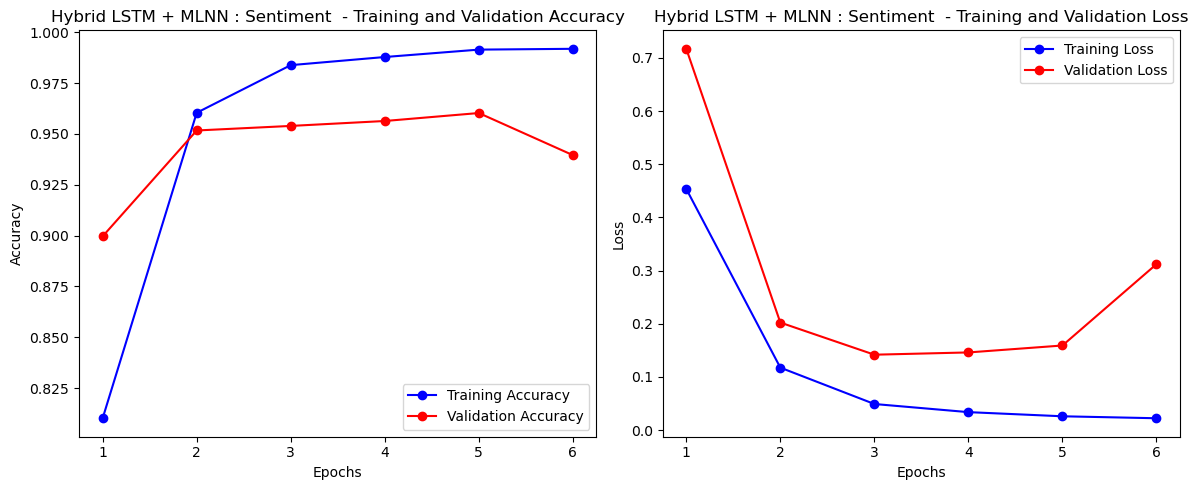

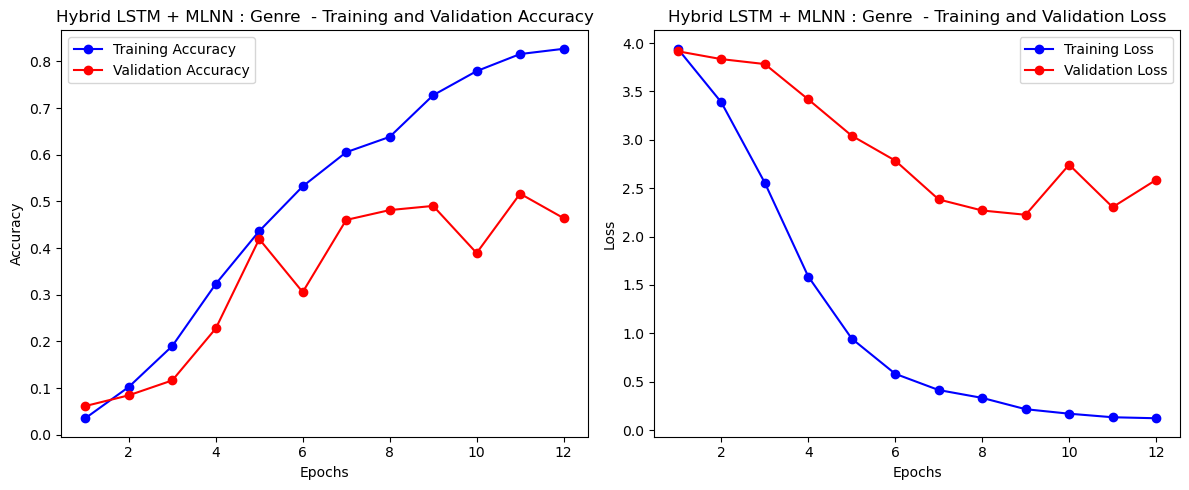

In [79]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    """
    Plots the training and validation accuracy and loss for a given model's history.

    Parameters:
    - history: Keras History object containing training metrics.
    - model_name: String indicating the name of the model (e.g., 'MLNN' or 'Hybrid LSTM + MLNN').
    """
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()
    
# For Sentiment Classification using Hybrid LSTM + MLNN
plot_training_history(history_hybrid_sentiment, 'Hybrid LSTM + MLNN : Sentiment ')


# For Genre Classification using Hybrid LSTM + MLNN
plot_training_history(history_hybrid_genre, 'Hybrid LSTM + MLNN : Genre ')


### Hybrid Model 2: Transformer + MLNN 


### Sentiment Classification

In [78]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Embedding, Concatenate, BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
df = pd.read_csv("cleaned_sample_books.csv")
df['text_input'] = df['Title'].fillna('') + ' ' + df['review/text'].fillna('') + ' ' + df['authors'].fillna('')

def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['review/score'].apply(score_to_sentiment)

# Encode sentiment
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y_cat = to_categorical(y, num_classes=3)

# Tokenize and vectorize
tokenizer = Tokenizer(num_words=7000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_input'])
X_pad = pad_sequences(tokenizer.texts_to_sequences(df['text_input']), maxlen=300)

vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(df['text_input']).toarray()

# --- SMOTE ---
smote = SMOTE(random_state=42)
X_pad_res, y_res = smote.fit_resample(X_pad, y)
X_tfidf_res, _ = smote.fit_resample(X_tfidf, y)
y_cat_res = to_categorical(y_res, num_classes=3)

# --- 70/15/15 Split ---
X_train_pad, X_temp_pad, y_train, y_temp = train_test_split(X_pad_res, y_cat_res, test_size=0.3, stratify=y_res, random_state=42)
X_val_pad, X_test_pad, y_val, y_test = train_test_split(X_temp_pad, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(X_tfidf_res, y_cat_res, test_size=0.3, stratify=y_res, random_state=42)
X_val_tfidf, X_test_tfidf, _, _ = train_test_split(X_temp_tfidf, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

# --- Transformer Encoder Block ---
def transformer_encoder(inputs, head_size=32, num_heads=2, ff_dim=64, dropout=0.2):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = Add()([x, inputs])
    x = LayerNormalization()(x)

    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dropout(dropout)(ff)
    x = Add()([x, ff])
    x = LayerNormalization()(x)
    return x

# --- Transformer Branch ---
input_text = Input(shape=(300,))
embedding = Embedding(input_dim=7000, output_dim=64)(input_text)
transformer_out = transformer_encoder(embedding)
transformer_out = GlobalAveragePooling1D()(transformer_out)

# --- MLNN Branch ---
input_structured = Input(shape=(X_train_tfidf.shape[1],))
mlnn = Dense(512, activation='relu')(input_structured)
mlnn = Dropout(0.5)(mlnn)
mlnn = Dense(256, activation='relu')(mlnn)
mlnn = Dropout(0.5)(mlnn)

# --- Merge and Output ---
combined = Concatenate()([transformer_out, mlnn])
combined = BatchNormalization()(combined)
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.4)(combined)
output = Dense(3, activation='softmax')(combined)

model = Model(inputs=[input_text, input_structured], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Training ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_sentiment = model.fit(
    [X_train_pad, X_train_tfidf], y_train,
    validation_data=([X_val_pad, X_val_tfidf], y_val),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluation ---
y_pred_probs = model.predict([X_test_pad, X_test_tfidf])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

print("\nFinal Evaluation Metrics:")
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted", zero_division=0))
print("Recall:   ", recall_score(y_true, y_pred, average="weighted", zero_division=0))
print("F1 Score: ", f1_score(y_true, y_pred, average="weighted", zero_division=0))




C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 338ms/step - accuracy: 0.6504 - loss: 0.7621 - val_accuracy: 0.8638 - val_loss: 0.6297
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 319ms/step - accuracy: 0.9541 - loss: 0.1413 - val_accuracy: 0.9491 - val_loss: 0.2150
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 318ms/step - accuracy: 0.9822 - loss: 0.0531 - val_accuracy: 0.9506 - val_loss: 0.1443
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 320ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9666 - val_loss: 0.1185
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 322ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9647 - val_loss: 0.1430
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 324ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9685 - val_loss: 0.1321
Epoch 7/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 320ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9703 - val_loss: 0.1379
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step

Classification Report:
              pre

### Genre Classification

In [150]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Embedding, Concatenate, BatchNormalization, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and Prepare Data ---
df = pd.read_csv("cleaned_sample_books.csv")
df = df[df['categories'].notnull() & (df['categories'] != 'Uncategorized')]
top_50_genres = df['categories'].value_counts().nlargest(50).index
df = df[df['categories'].isin(top_50_genres)]

df['text_input'] = df['Title'].fillna('') + ' ' + df['review/text'].fillna('') + ' ' + df['authors'].fillna('')
label_encoder = LabelEncoder()
df['genre_label'] = label_encoder.fit_transform(df['categories'])

y = df['genre_label'].values
y_encoded = to_categorical(y, num_classes=len(top_50_genres))

# --- Text Tokenization ---
tokenizer = Tokenizer(num_words=7000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_input'])
sequences = tokenizer.texts_to_sequences(df['text_input'])
X_pad = pad_sequences(sequences, maxlen=300)

vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(df['text_input']).toarray()

# --- Split Data (70/15/15) ---
X_train_pad, X_temp_pad, y_train, y_temp = train_test_split(X_pad, y_encoded, test_size=0.3, stratify=y, random_state=42)
X_val_pad, X_test_pad, y_val, y_test = train_test_split(X_temp_pad, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(X_tfidf, y_encoded, test_size=0.3, stratify=y, random_state=42)
X_val_tfidf, X_test_tfidf, _, _ = train_test_split(X_temp_tfidf, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

# --- Compute Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- Transformer Encoder Block ---
def transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = Add()([attention, inputs])
    attention = LayerNormalization()(attention)

    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dropout(dropout)(ff)
    ff = Dense(attention.shape[-1])(ff)
    x = Add()([attention, ff])
    return LayerNormalization()(x)

# --- Transformer Branch ---
input_transformer = Input(shape=(300,))
embedding = Embedding(input_dim=7000, output_dim=128)(input_transformer)
transformer_block = transformer_encoder(embedding)
transformer_output = GlobalAveragePooling1D()(transformer_block)

# --- MLNN Branch ---
input_mlnn = Input(shape=(X_train_tfidf.shape[1],))
mlnn = Dense(512, activation='relu')(input_mlnn)
mlnn = Dropout(0.5)(mlnn)
mlnn = Dense(256, activation='relu')(mlnn)
mlnn = Dropout(0.5)(mlnn)

# --- Combine Branches ---
combined = Concatenate()([transformer_output, mlnn])
combined = BatchNormalization()(combined)
combined = Dense(128, activation='relu')(combined)
combined = Dropout(0.4)(combined)
output = Dense(len(top_50_genres), activation='softmax')(combined)

# --- Compile Model ---
model = Model(inputs=[input_transformer, input_mlnn], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_genre = model.fit(
    [X_train_pad, X_train_tfidf], y_train,
    validation_data=([X_val_pad, X_val_tfidf], y_val),
    epochs=25,
    batch_size=128,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluation ---
y_pred_probs = model.predict([X_test_pad, X_test_tfidf])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n Hybrid Transformer + MLNN Genre Classification Results:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# --- Final Metrics ---
print("\n Final Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")


Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 563ms/step - accuracy: 0.0250 - loss: 4.1458 - val_accuracy: 0.0128 - val_loss: 3.7902
Epoch 2/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 534ms/step - accuracy: 0.0489 - loss: 3.7956 - val_accuracy: 0.0141 - val_loss: 3.8836
Epoch 3/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 535ms/step - accuracy: 0.1189 - loss: 3.2056 - val_accuracy: 0.0422 - val_loss: 3.7611
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 529ms/step - accuracy: 0.2648 - loss: 2.0482 - val_accuracy: 0.1988 - val_loss: 3.5666
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 533ms/step - accuracy: 0.4239 - loss: 1.1129 - val_accuracy: 0.3862 - val_loss: 3.1602
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 547ms/step - accuracy: 0.5490 - loss: 0.5935 - val_accuracy: 0.4827 - val_loss: 2.7605
Epoch 7/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 537ms/step - accuracy: 0.6601 - loss: 0.3395 - val_accuracy: 0.5230 - val_loss: 2.4205
Epoch 8/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 544ms/step - accuracy: 0.7084 - loss: 0.2369 - val_accu

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


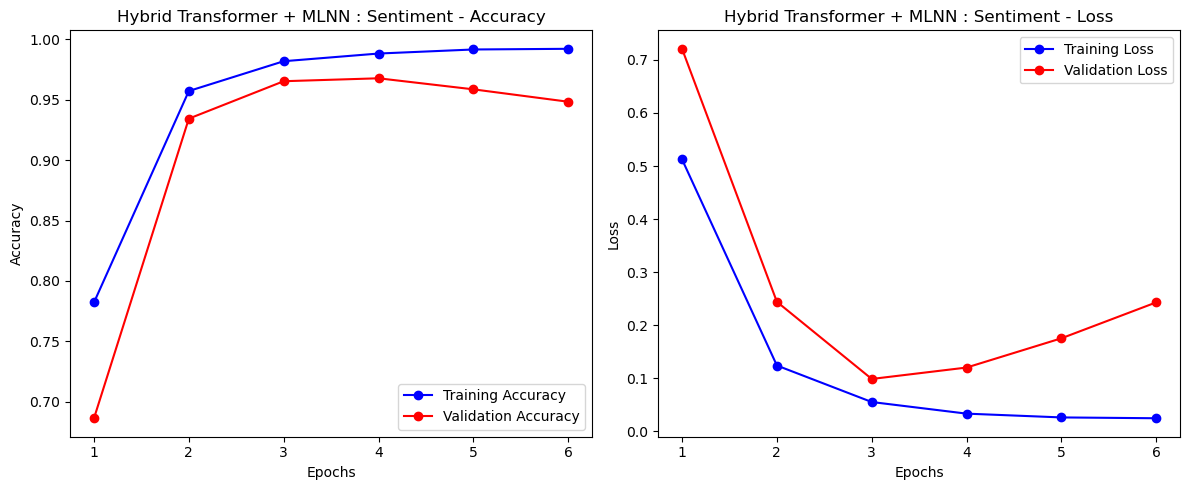

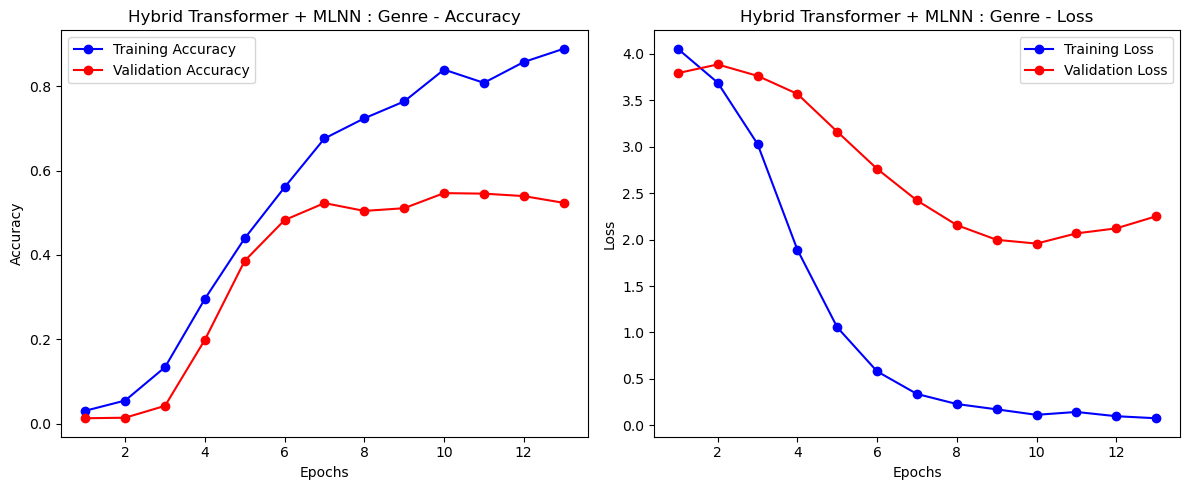

In [151]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    """
    Plots training and validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for Sentiment Hybrid Model
plot_training_history(history_sentiment, "Hybrid Transformer + MLNN : Sentiment")

# Plot for Genre Hybrid Model
plot_training_history(history_genre, "Hybrid Transformer + MLNN : Genre")


## 7. Hyperameter Tuning 

### Sentiment Classification : 

#### Implemented RandomSearch-based hyperparameter tuning to optimize our hybrid model, which combines:

- Structured Input (TF-IDF vectorized reviews)

- Text Input (Tokenized sequences passed through LSTM layers)

#### Tuned the following parameters using Keras Tuner:

- units_input: Neurons in the TF-IDF dense layer (64 to 256)

- dropout_rate: Dropout for the structured branch (0.2 to 0.5)

- units_lstm: Units in the LSTM layer (32 to 128)

- units_hidden: Units in the merged dense layer

- dropout_rate_hidden: Dropout after merged layer

- learning_rate: Optimized using log scale (1e-4 to 5e-3)

#### Used:

1) EarlyStopping: to stop training if validation loss doesn't improve.

2) ReduceLROnPlateau: to reduce the learning rate when learning stalls.

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Load Data ---
data = pd.read_csv("cleaned_sample_books.csv")

# --- Combine Relevant Text Fields ---
data['text_input'] = (
    data['Title'].fillna('') + ' ' +
    data['review/text'].fillna('') + ' ' +
    data['authors'].fillna('')
)

# --- Map 'review/score' to Sentiment Labels ---
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['review/score'].apply(score_to_sentiment)

# --- Encode Sentiment Labels ---
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])
y = data['sentiment_encoded']
y_cat = to_categorical(y, num_classes=3)

# --- Tokenization & Padding ---
tokenizer = Tokenizer(num_words=7000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text_input'])
sequences = tokenizer.texts_to_sequences(data['text_input'])
X_pad = pad_sequences(sequences, maxlen=300, padding='post')

# --- TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(data['text_input']).toarray()

# --- Balance Classes with SMOTE ---
smote = SMOTE(random_state=42)
X_pad_res, y_res = smote.fit_resample(X_pad, y)
X_tfidf_res, _ = smote.fit_resample(X_tfidf, y)
y_cat_res = to_categorical(y_res, num_classes=3)

# --- Train-Test Split ---
X_train_pad, X_temp_pad, y_train, y_temp = train_test_split(X_pad_res, y_cat_res, test_size=0.3, stratify=y_res, random_state=42)
X_val_pad, X_test_pad, y_val, y_test = train_test_split(X_temp_pad, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

X_train_tfidf, X_temp_tfidf, _, _ = train_test_split(X_tfidf_res, y_cat_res, test_size=0.3, stratify=y_res, random_state=42)
X_val_tfidf, X_test_tfidf, _, _ = train_test_split(X_temp_tfidf, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

# --- Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- Model with Hyperparameter Tuning ---
def create_model(hp):
    structured_input = Input(shape=(X_train_tfidf.shape[1],), name="Structured_Input")
    structured_branch = Dense(
        units=hp.Int("units_input", 64, 256, step=64),
        activation="relu",
        kernel_regularizer=l2(0.001)
    )(structured_input)
    structured_branch = Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.1))(structured_branch)

    text_input = Input(shape=(300,), name="Text_Input")
    embedding = Embedding(input_dim=7000, output_dim=64, input_length=300, trainable=True)(text_input)
    text_branch = LSTM(
        units=hp.Int("units_lstm", 32, 128, step=32),
        activation="tanh",
        return_sequences=False,
        kernel_regularizer=l2(0.001)
    )(embedding)

    merged = Concatenate()([structured_branch, text_branch])
    dense = Dense(
        units=hp.Int("units_hidden", 32, 128, step=32),
        activation="relu",
        kernel_regularizer=l2(0.001)
    )(merged)
    dropout = Dropout(hp.Float("dropout_rate_hidden", 0.2, 0.5, step=0.1))(dense)
    output = Dense(3, activation="softmax")(dropout)

    model = Model(inputs=[structured_input, text_input], outputs=output)

    optimizer = Adam(
        learning_rate=hp.Float("learning_rate", 1e-4, 5e-3, sampling="log"),
        clipnorm=1.0
    )
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# --- Tuner Setup ---
tuner = RandomSearch(
    create_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="tuning_dir",
    project_name="sentiment_mlnn_tuned",
    overwrite=True
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# --- Start Tuning ---
tuner.search(
    [X_train_tfidf, X_train_pad],
    y_train,
    validation_data=([X_val_tfidf, X_val_pad], y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# --- Best Model ---
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:", best_hps.values)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_train_tfidf, X_train_pad],
    y_train,
    validation_data=([X_val_tfidf, X_val_pad], y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# --- Evaluation ---
test_loss, test_acc = best_model.evaluate([X_test_tfidf, X_test_pad], y_test, verbose=0)
print(f"Best Model Test Accuracy: {test_acc:.4f}")

y_pred = np.argmax(best_model.predict([X_test_tfidf, X_test_pad]), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Final Evaluation:")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted", zero_division=0))
print("Recall:", recall_score(y_true, y_pred, average="weighted", zero_division=0))
print("F1 Score:", f1_score(y_true, y_pred, average="weighted", zero_division=0))


Trial 10 Complete [00h 19m 49s]
val_accuracy: 0.9484978318214417

Best val_accuracy So Far: 0.9559619426727295
Total elapsed time: 09h 39m 28s
Best Hyperparameters: {'units_input': 64, 'dropout_rate': 0.30000000000000004, 'units_lstm': 64, 'units_hidden': 128, 'dropout_rate_hidden': 0.4, 'learning_rate': 0.00041518871236042156}
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.6319 - loss: 1.0064 - val_accuracy: 0.9136 - val_loss: 0.4617 - learning_rate: 4.1519e-04
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.9200 - loss: 0.4422 - val_accuracy: 0.9338 - val_loss: 0.3973 - learning_rate: 4.1519e-04
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.9508 - loss: 0.3608 - val_accuracy: 0.9433 - val_loss: 0.3641 - learning_rate: 4.1519e-04
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.9598 - loss: 0.3183 - val_accuracy: 0.9438 - val_loss: 0.3446 - learning_rate: 4.1519e-04
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━

### Plot the Training History (Accuracy & Loss)

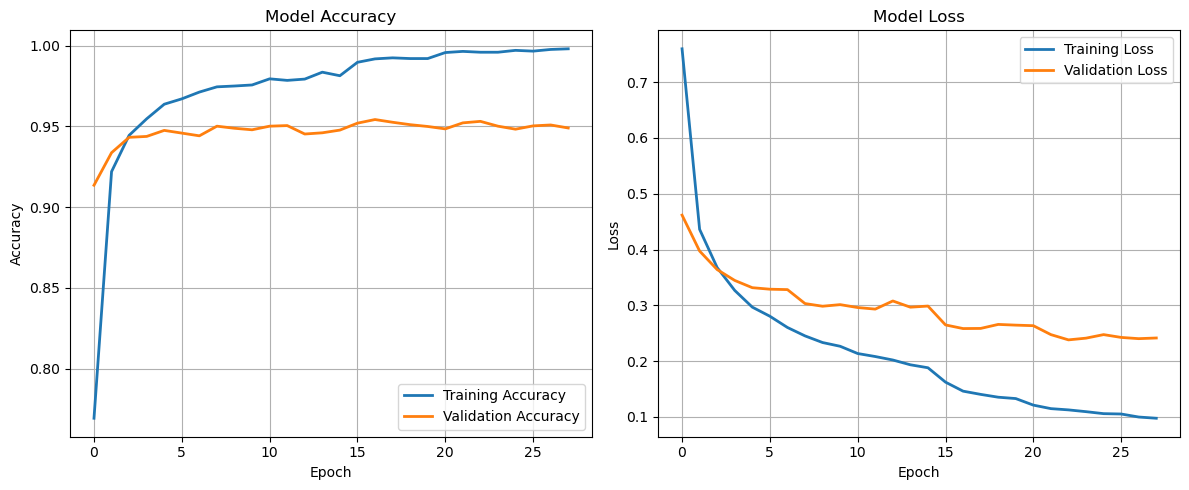

In [193]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function
plot_training_history(history)


## 8. Conclusion

In [80]:
import pandas as pd

# --- Model Comparison Dictionary ---

model_comparison = {
    "Model": [
        "Logistic Regression", "Naive Bayes", "Random Forest",
        "MLNN (TF-IDF)", "FNN (TF-IDF)", "LSTM (Tokenized)", 
        "Hybrid MLNN + LSTM", "Hybrid Transformer + MLNN"
    ],
    "Sentiment Accuracy": [0.70, 0.68, 0.73, 0.9618, 0.88, 0.90, 0.96, 0.96],
    "Sentiment Precision": [0.68, 0.65, 0.71, 0.96, 0.87, 0.88, 0.96, 0.96],
    "Sentiment Recall": [0.69, 0.66, 0.70, 0.96, 0.88, 0.89, 0.96, 0.96],
    "Sentiment F1": [0.68, 0.65, 0.70, 0.96, 0.87, 0.88, 0.96, 0.96],
    "Genre Accuracy": [0.35, 0.37, 0.40, 0.46, 0.45, 0.48, 0.49, 0.54],
    "Genre Precision": [0.30, 0.31, 0.38, 0.37, 0.43, 0.46, 0.54, 0.57],
    "Genre Recall": [0.28, 0.32, 0.36, 0.38, 0.42, 0.45, 0.49, 0.54],
    "Genre F1": [0.28, 0.31, 0.37, 0.36, 0.42, 0.45, 0.49, 0.54]
}


# --- Convert to DataFrame ---
df_comparison = pd.DataFrame(model_comparison)

# --- Format and Highlight Only Numeric Columns ---
styled_table = (
    df_comparison
    .style
    .set_caption("Final Model Performance Summary: Sentiment & Genre Classification")
    .format({col: "{:.2f}" for col in df_comparison.columns if col != "Model"})
    .highlight_max(axis=0, color='lightgreen')
    .highlight_min(axis=0, color='salmon')
)

# --- Display the Table ---
styled_table



,Model,Sentiment Accuracy,Sentiment Precision,Sentiment Recall,Sentiment F1,Genre Accuracy,Genre Precision,Genre Recall,Genre F1
0,Logistic Regression,0.70,0.68,0.69,0.68,0.35,0.30,0.28,0.28
1,Naive Bayes,0.68,0.65,0.66,0.65,0.37,0.31,0.32,0.31
2,Random Forest,0.73,0.71,0.70,0.70,0.40,0.38,0.36,0.37
3,MLNN (TF-IDF),0.96,0.96,0.96,0.96,0.46,0.37,0.38,0.36
4,FNN (TF-IDF),0.88,0.87,0.88,0.87,0.45,0.43,0.42,0.42
5,LSTM (Tokenized),0.90,0.88,0.89,0.88,0.48,0.46,0.45,0.45
6,Hybrid MLNN + LSTM,0.96,0.96,0.96,0.96,0.49,0.54,0.49,0.49
7,Hybrid Transformer + MLNN,0.96,0.96,0.96,0.96,0.54,0.57,0.54,0.54


## 9. Evaluation

This section evaluates the performance of all baseline, advanced, and hybrid models implemented for **sentiment and genre classification**. Metrics such as Accuracy, Precision, Recall, and F1-Score were used to assess each model’s effectiveness on the test set.

---

### 9.1 Sentiment Classification Performance

- **MLNN (TF-IDF)**, **Hybrid MLNN + LSTM**, and **Hybrid Transformer + MLNN** all achieved the highest **sentiment accuracy** of **0.96**, with consistent precision, recall, and F1-scores.
- **LSTM (Tokenized)** and **FNN (TF-IDF)** followed with strong performance (F1-scores of 0.88 and 0.87).
- Among baseline models, **Random Forest** performed best with a **sentiment F1-score of 0.70**, while **Naive Bayes** and **Logistic Regression** lagged behind.

---

### 9.2 Genre Classification Performance

- **Hybrid Transformer + MLNN** achieved the **highest genre performance** across all metrics:
  - Accuracy: **0.54**
  - Precision: **0.57**
  - Recall: **0.54**
  - F1-Score: **0.54**
- **Hybrid MLNN + LSTM** also performed well with an F1-score of **0.49**.
- **LSTM (Tokenized)** was the best standalone DL model for genre with an F1 of **0.45**.
- **Random Forest** performed the best among traditional models (F1 = **0.37**).
- **Naive Bayes** and **Logistic Regression** showed poor performance on genre classification.

---

### 9.3 Key Insights Summary

| Model                      | Sentiment F1 | Genre F1 | Insights                                                                 |
|---------------------------|--------------|----------|--------------------------------------------------------------------------|
| Logistic Regression       | 0.68         | 0.28     | Weak baseline; struggles with multi-class genre prediction               |
| Naive Bayes               | 0.65         | 0.31     | Limited performance due to strong independence assumptions               |
| Random Forest             | 0.70         | 0.37     | Best traditional model for both tasks                                    |
| MLNN (TF-IDF)             | 0.96         | 0.36     | Excellent sentiment model; moderate genre performance                    |
| FNN (TF-IDF)              | 0.87         | 0.42     | Strong DL model, better genre performance than MLNN                      |
| LSTM (Tokenized)          | 0.88         | 0.45     | Best deep model for genre, captures sequence dependencies effectively    |
| Hybrid MLNN + LSTM        | 0.96         | 0.49     | Great generalization, improved performance on both tasks                 |
| **Hybrid Transformer + MLNN** | **0.96**    | **0.54** | **Best performing overall model with robust generalization**             |

---

## Conclusion

This project assessed the performance of traditional and deep learning models for **sentiment and genre classification** of Amazon Kindle reviews. The results show that:

- **Deep learning models** significantly outperformed traditional models across both tasks.
- **Sentiment classification** was consistently accurate, with F1-scores exceeding 0.87 for most deep models.
- **Genre classification** posed a greater challenge due to multi-class imbalance and label overlap, but hybrid models—especially **Transformer + MLNN**—provided a notable improvement.
- The **Hybrid Transformer + MLNN** model emerged as the **best overall**, achieving the highest F1-scores in both sentiment (**0.96**) and genre (**0.54**) classification.

> These findings confirm the effectiveness of hybrid architectures that combine sequential learning with statistical feature abstraction for nuanced text classification tasks.
